In [129]:
import pyarrow.parquet as pq
import pyarrow as pa
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Chunk csv and write to parquet

In [2]:
# csv_file_path = "/Users/lowi33/Capstone/nasdaq_exteral_data.csv"  # Change this to the CSV filename
# parquet_folder = "/Users/lowi33/Capstone/parquet"  # Folder to store parquet chunks

# # Ensure the output folder exists
# os.makedirs(parquet_folder, exist_ok=True)

# # Define consistent data types
# dtype_dict = {
#     "Unnamed: 0": "float64",
#     "Date": "string",
#     "Article_title": "string",
#     "Stock_symbol": "string",
#     "Url": "string",
#     "Publisher": "string",
#     "Author": "string",
#     "Article": "string",
#     "Lsa_summary": "string",
#     "Luhn_summary": "string",
#     "Textrank_summary": "string",
#     "Lexrank_summary": "string"
# }

# # Load CSV in chunks
# chunk_size = 1_000_000  # Adjust based on memory capacity
# chunks = pd.read_csv(csv_file_path, chunksize=chunk_size, dtype=dtype_dict)

# # Process and save each chunk separately
# for i, chunk in enumerate(chunks):
#     parquet_chunk_path = os.path.join(parquet_folder, f"chunk_{i}.parquet")
#     chunk.to_parquet(parquet_chunk_path, engine='pyarrow', index=False)
#     print(f"Saved chunk {i} to {parquet_chunk_path}")

# print(f"All chunks saved in {parquet_folder}")


Saved chunk 0 to /Users/lowi33/Capstone/parquet/chunk_0.parquet
Saved chunk 1 to /Users/lowi33/Capstone/parquet/chunk_1.parquet
Saved chunk 2 to /Users/lowi33/Capstone/parquet/chunk_2.parquet
Saved chunk 3 to /Users/lowi33/Capstone/parquet/chunk_3.parquet
Saved chunk 4 to /Users/lowi33/Capstone/parquet/chunk_4.parquet
Saved chunk 5 to /Users/lowi33/Capstone/parquet/chunk_5.parquet
Saved chunk 6 to /Users/lowi33/Capstone/parquet/chunk_6.parquet
Saved chunk 7 to /Users/lowi33/Capstone/parquet/chunk_7.parquet
Saved chunk 8 to /Users/lowi33/Capstone/parquet/chunk_8.parquet
Saved chunk 9 to /Users/lowi33/Capstone/parquet/chunk_9.parquet
Saved chunk 10 to /Users/lowi33/Capstone/parquet/chunk_10.parquet
Saved chunk 11 to /Users/lowi33/Capstone/parquet/chunk_11.parquet
Saved chunk 12 to /Users/lowi33/Capstone/parquet/chunk_12.parquet
Saved chunk 13 to /Users/lowi33/Capstone/parquet/chunk_13.parquet
Saved chunk 14 to /Users/lowi33/Capstone/parquet/chunk_14.parquet
Saved chunk 15 to /Users/lowi3

In [2]:
# parquet_folder = "/Users/lowi33/Capstone/parquet"


# parquet_files = sorted(glob.glob(os.path.join(parquet_folder, "*.parquet")))

# # Read and concatenate all chunks
# tables = [pq.read_table(f) for f in parquet_files]
# final_table = pa.concat_tables(tables)

# # Save the merged parquet file
# final_parquet_file = "final_output.parquet"
# pq.write_table(final_table, final_parquet_file)

# print(f"Merged all chunks into {final_parquet_file}")

Merged all chunks into final_output.parquet


## Read in parquet sample

In [75]:
df = pd.read_parquet('/Users/lowi33/Capstone/parquet/chunk_0.parquet')

### Data Cleaning

In [76]:
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   Unnamed: 0        1000000 non-null  float64            
 1   Date              1000000 non-null  datetime64[ns, UTC]
 2   Article_title     1000000 non-null  string             
 3   Stock_symbol      1000000 non-null  string             
 4   Url               1000000 non-null  string             
 5   Publisher         0 non-null        string             
 6   Author            0 non-null        string             
 7   Article           999999 non-null   string             
 8   Lsa_summary       999998 non-null   string             
 9   Luhn_summary      999999 non-null   string             
 10  Textrank_summary  999999 non-null   string             
 11  Lexrank_summary   999999 non-null   string             
dtypes: datetime64[ns, UTC](1), fl

In [78]:
df = df.drop(columns = [
    'Unnamed: 0',
    'Publisher',
    'Author'
])
df = df.fillna('')

In [81]:
df_lengths = df[[
    'Article',
    'Lsa_summary',
    'Luhn_summary',
    'Textrank_summary',
    'Lexrank_summary'
]].applymap(len)

# Add a grand total row with the average length for each column
df_lengths.loc['Grand Total'] = df_lengths.mean()

In [82]:
df_lengths

,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,4482.000000,970.00000,543.00000,1026.000000,848.000000
1,5156.000000,427.00000,424.00000,380.000000,230.000000
2,2493.000000,797.00000,762.00000,694.000000,594.000000
3,4968.000000,427.00000,576.00000,657.000000,534.000000
4,2448.000000,327.00000,326.00000,308.000000,247.000000
...,...,...,...,...,...
999996,5940.000000,697.00000,898.00000,898.000000,523.000000
999997,9972.000000,424.00000,476.00000,801.000000,426.000000
999998,4862.000000,398.00000,409.00000,409.000000,347.000000
999999,4907.000000,391.00000,391.00000,322.000000,322.000000


In [83]:
df["Lsa_summary_len"] = df["Lsa_summary"].apply(lambda x: len(str(x).split()))
df["Luhn_summary_len"] = df["Luhn_summary"].apply(lambda x: len(str(x).split()))
df["Textrank_summary_len"] = df["Textrank_summary"].apply(lambda x: len(str(x).split()))
df["Lexrank_summary_len"] = df["Lexrank_summary"].apply(lambda x: len(str(x).split()))
df["Article_len"] = df["Article"].apply(lambda x: len(str(x).split()))

df_melted = df.melt(
    id_vars=["Date", "Article_title", "Stock_symbol", "Url", "Article_len"], 
    value_vars=["Lsa_summary_len", "Luhn_summary_len", "Textrank_summary_len", "Lexrank_summary_len"],
    var_name="Summarization Method", 
    value_name="Token Length"
)

## EDA

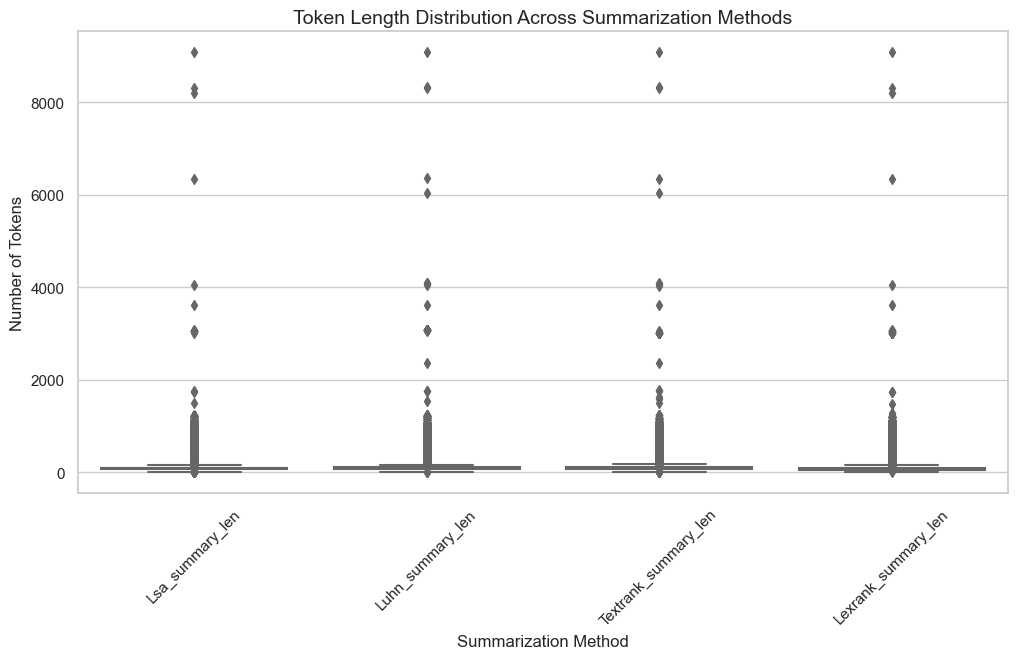

In [84]:
# we've got some outliers...
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Summarization Method", y="Token Length", palette="coolwarm")

plt.title("Token Length Distribution Across Summarization Methods", fontsize=14)
plt.xlabel("Summarization Method", fontsize=12)
plt.ylabel("Number of Tokens", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [85]:
len(df[df['Lexrank_summary_len'] > 1000])

311

In [86]:
df['Article_len'].describe()

count    1000000.000000
mean         743.546668
std          960.208763
min            0.000000
25%          357.000000
50%          617.000000
75%          868.000000
max        55322.000000
Name: Article_len, dtype: float64

In [87]:
len(df)

1000000

In [88]:
df = df[df['Article_len'] < 1000]

In [89]:
len(df)

841432

In [90]:
def truncate(text, total_tokens=500):
    '''
    Since finBERT has a limitation around ~500 tokens as input, let's truncate the outliers to 500 words.
    Let's take the first 250, middle 125, and last 125 for solid context, body, and conclusion representation. 
    '''
    words = str(text).split()
    if len(words) <= total_tokens:
        return text  # No truncation needed
    return " ".join(words[:250] + words[len(words)//2: len(words)//2 + 125] + words[-125:])

df["Lsa_summary"] = df["Lsa_summary"].apply(lambda x: truncate(x, 500))
df["Luhn_summary"] = df["Luhn_summary"].apply(lambda x: truncate(x, 500))
df["Textrank_summary"] = df["Textrank_summary"].apply(lambda x: truncate(x, 500))
df["Lexrank_summary"] = df["Lexrank_summary"].apply(lambda x: truncate(x, 500))


In [91]:
# Get token lengths
df["Lsa_summary_len"] = df["Lsa_summary"].apply(lambda x: len(str(x).split()))
df["Luhn_summary_len"] = df["Luhn_summary"].apply(lambda x: len(str(x).split()))
df["Textrank_summary_len"] = df["Textrank_summary"].apply(lambda x: len(str(x).split()))
df["Lexrank_summary_len"] = df["Lexrank_summary"].apply(lambda x: len(str(x).split()))
df["Article_len"] = df["Article"].apply(lambda x: len(str(x).split()))

# Melt summarization methods
df_melted = df.melt(
    id_vars=["Date", "Article_title", "Stock_symbol", "Url", "Article_len"], 
    value_vars=["Lsa_summary_len", "Luhn_summary_len", "Textrank_summary_len", "Lexrank_summary_len"],
    var_name="Summarization Method", 
    value_name="Token Length"
)

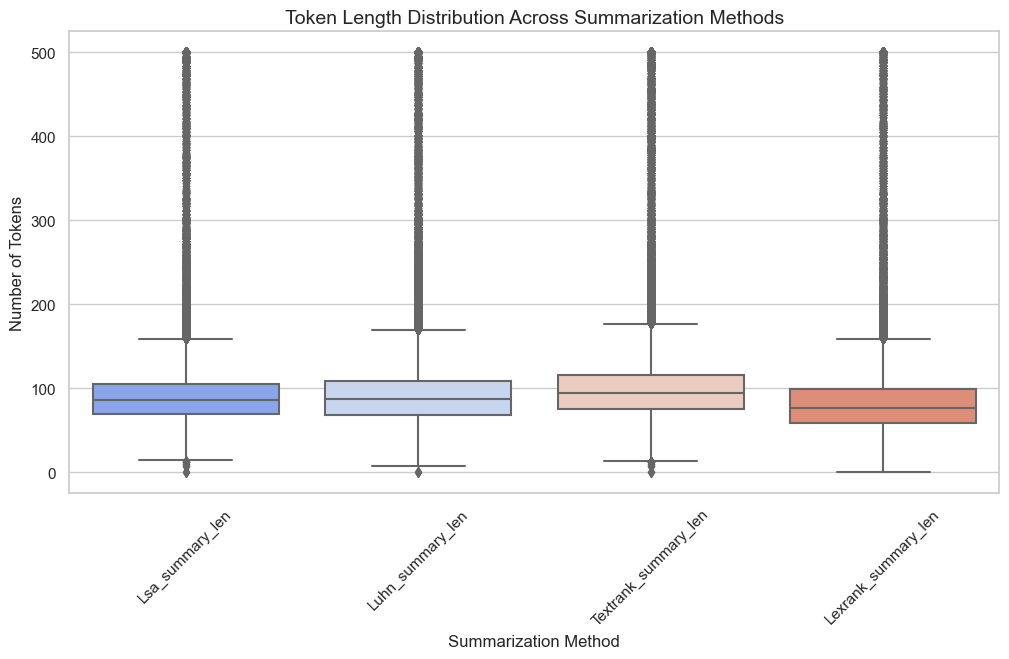

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Summarization Method", y="Token Length", palette="coolwarm")

plt.title("Token Length Distribution Across Summarization Methods", fontsize=14)
plt.xlabel("Summarization Method", fontsize=12)
plt.ylabel("Number of Tokens", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [96]:
df = df.sort_values(by='Lexrank_summary_len', ascending=False)

In [116]:
df = df[df['Lexrank_summary'].apply(lambda x: len(str(x).strip()) > 1)]
df = df[df['Lsa_summary'].apply(lambda x: len(str(x).strip()) > 1)]
df = df[df['Luhn_summary'].apply(lambda x: len(str(x).strip()) > 1)]
df = df[df['Textrank_summary'].apply(lambda x: len(str(x).strip()) > 1)]

In [122]:
df.tail(10)['Lexrank_summary'].sample(10).values

array(['Abort -- Tory Bruno (@torybruno) October 1, 2020',
       'Yahoo! However, Yahoo! The only way Yahoo!',
       'COP: Flat Copyright (C) 2016 MTNewswires.com. Top Energy Stocks:',
       'Image source: The Motley Fool. Crown Castle International',
       'COP: Flat Copyright (C) 2016 MTNewswires.com. Top Energy Stocks:',
       "Yahoo! Japan's online shopping division. Japan.",
       'CTRM)." But CTRM? CTRM Stock Weekly Price Chart',
       'Blink Charging (NASDAQ:BLNK). Electrameccanica (NASDAQ:SOLO). But not Tesla.',
       'COP: Flat Copyright (C) 2016 MTNewswires.com. Top Energy Stocks:',
       'Eikon search string for individual stock moves: STXBZ'],
      dtype=object)

In [119]:
len(df)

841430

In [131]:
# Extract day and month for plotting
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month.astype('category')
df['year'] = df['Date'].dt.year

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841430 entries, 118122 to 848713
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Date                  841430 non-null  datetime64[ns, UTC]
 1   Article_title         841430 non-null  string             
 2   Stock_symbol          841430 non-null  string             
 3   Url                   841430 non-null  string             
 4   Article               841430 non-null  string             
 5   Lsa_summary           841430 non-null  object             
 6   Luhn_summary          841430 non-null  object             
 7   Textrank_summary      841430 non-null  object             
 8   Lexrank_summary       841430 non-null  object             
 9   Lsa_summary_len       841430 non-null  int64              
 10  Luhn_summary_len      841430 non-null  int64              
 11  Textrank_summary_len  841430 non-null  int64   

In [133]:
df_count = df.groupby("year").size().reset_index(name="count")

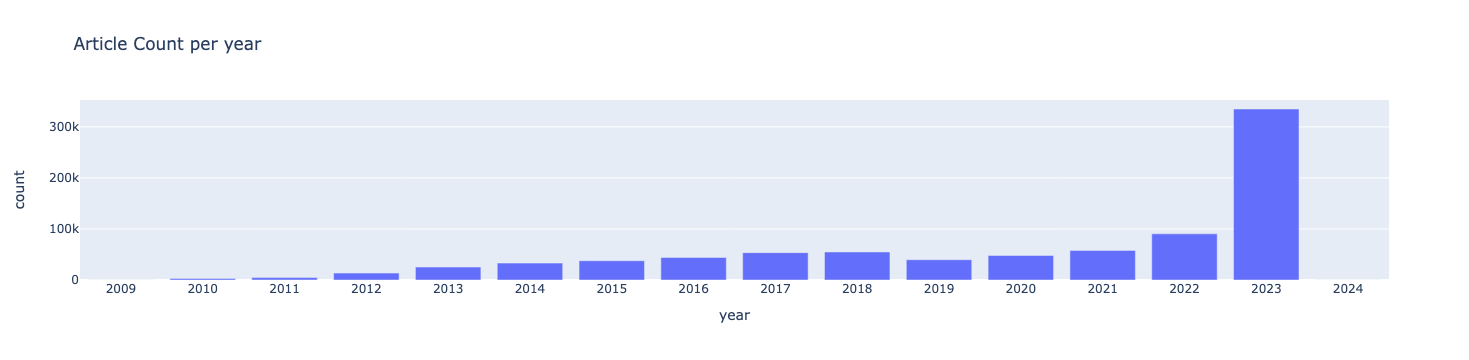

In [137]:
fig = px.bar(df_count, x="year", y="count", title='Article Count per year')
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=df_count["year"])
    )
fig.show()

In [155]:
def calendar(df, year):
    # Filter for the selected year
    df = df.loc[df['year'] == year]

    # Create a pivot table with days as columns and months as rows
    df_grouped = df.groupby(['month', 'day']).size().reset_index(name='count')

    # Correctly pivot the DataFrame
    df_pivot = df_grouped.pivot(index='month', columns='day', values='count').fillna(0)  # Fill NaN with 0 for missing dates

    # Create the heatmap
    plt.figure(figsize=(18, 12))  # Adjust figure size if needed
    sns.heatmap(df_pivot, annot=True, fmt="g", cmap="Blues", cbar_kws={'label': 'Article Count'},
                xticklabels=range(1, 32), yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                linewidths=0.5,
                vmin=0,
                vmax=8) # feel free to adjust this to change the threshold for what counts as a 'hole'

    # Customize the axes and title
    plt.title(f'{year} Article Heatmap')
    plt.xlabel('Day of Month')
    plt.ylabel('Month')

    # Show the plot
    plt.show()

In [156]:
years = sorted(df['year'].unique())

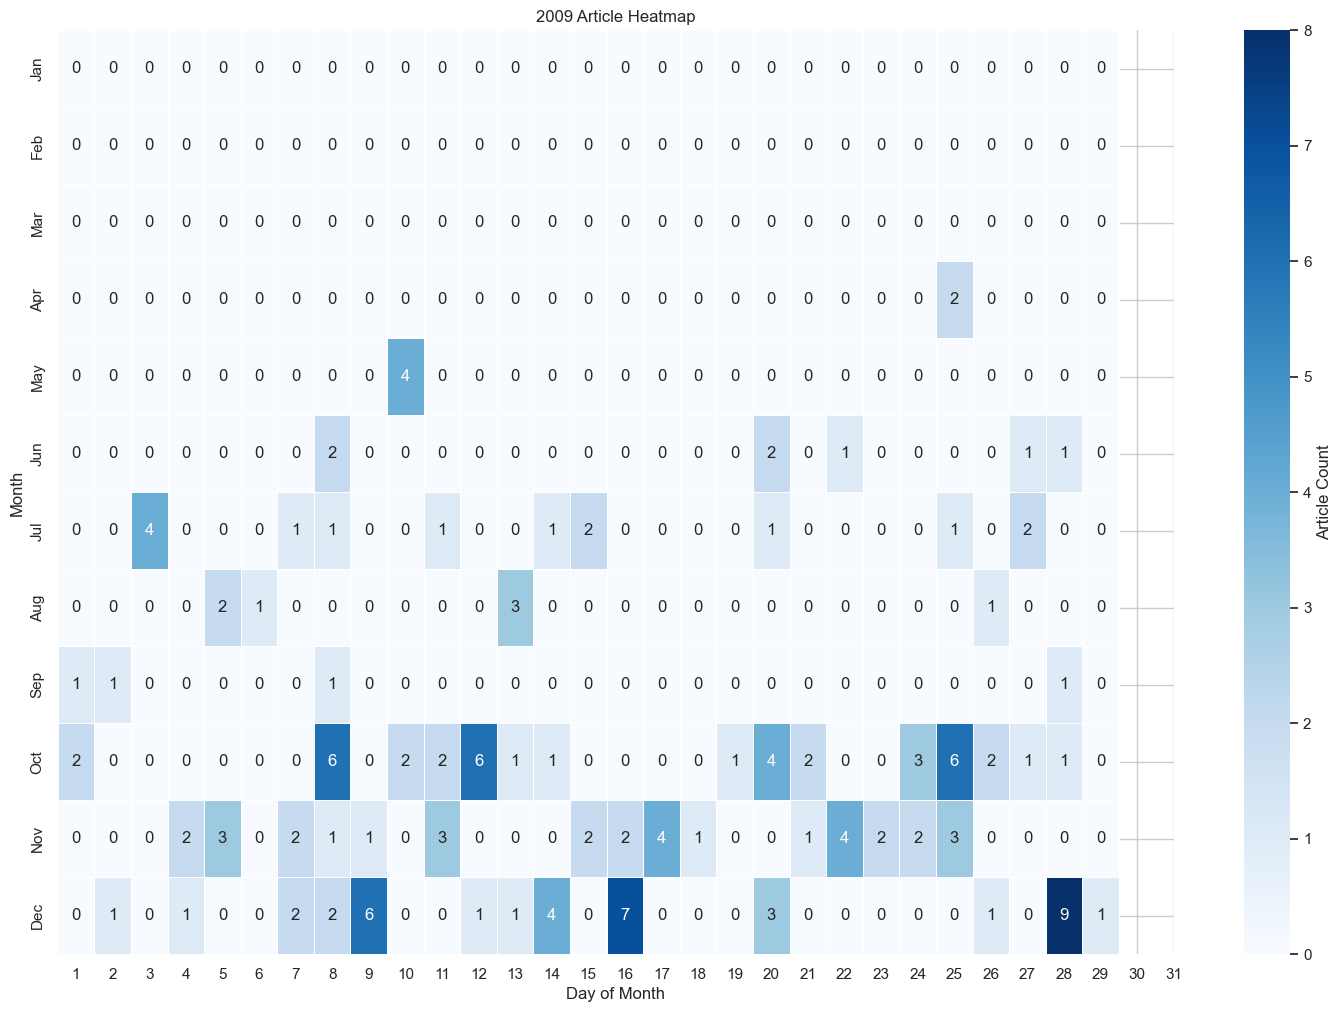

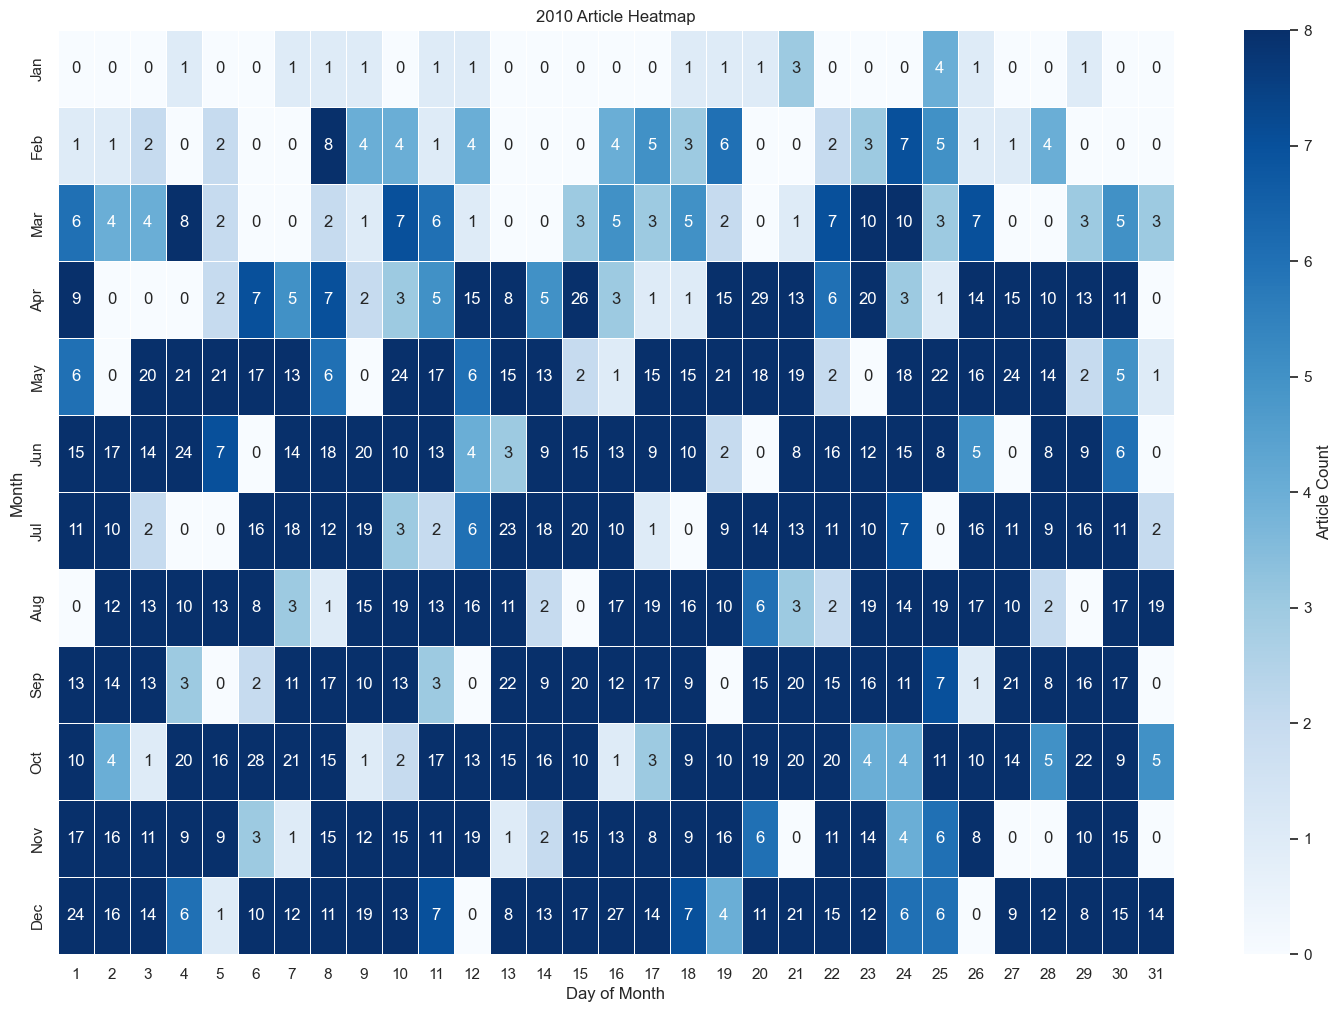

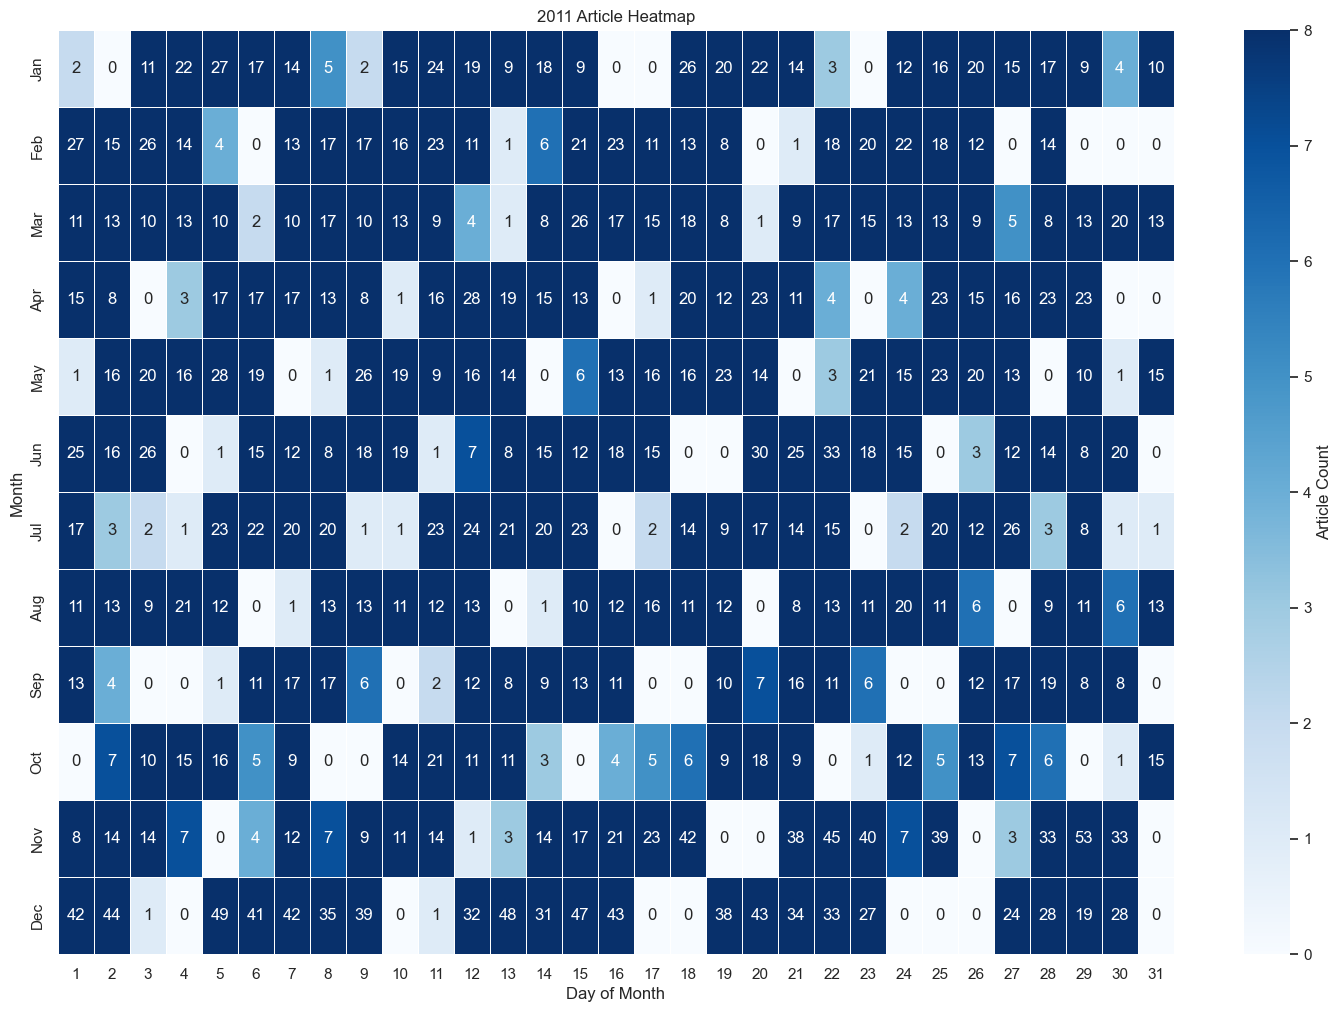

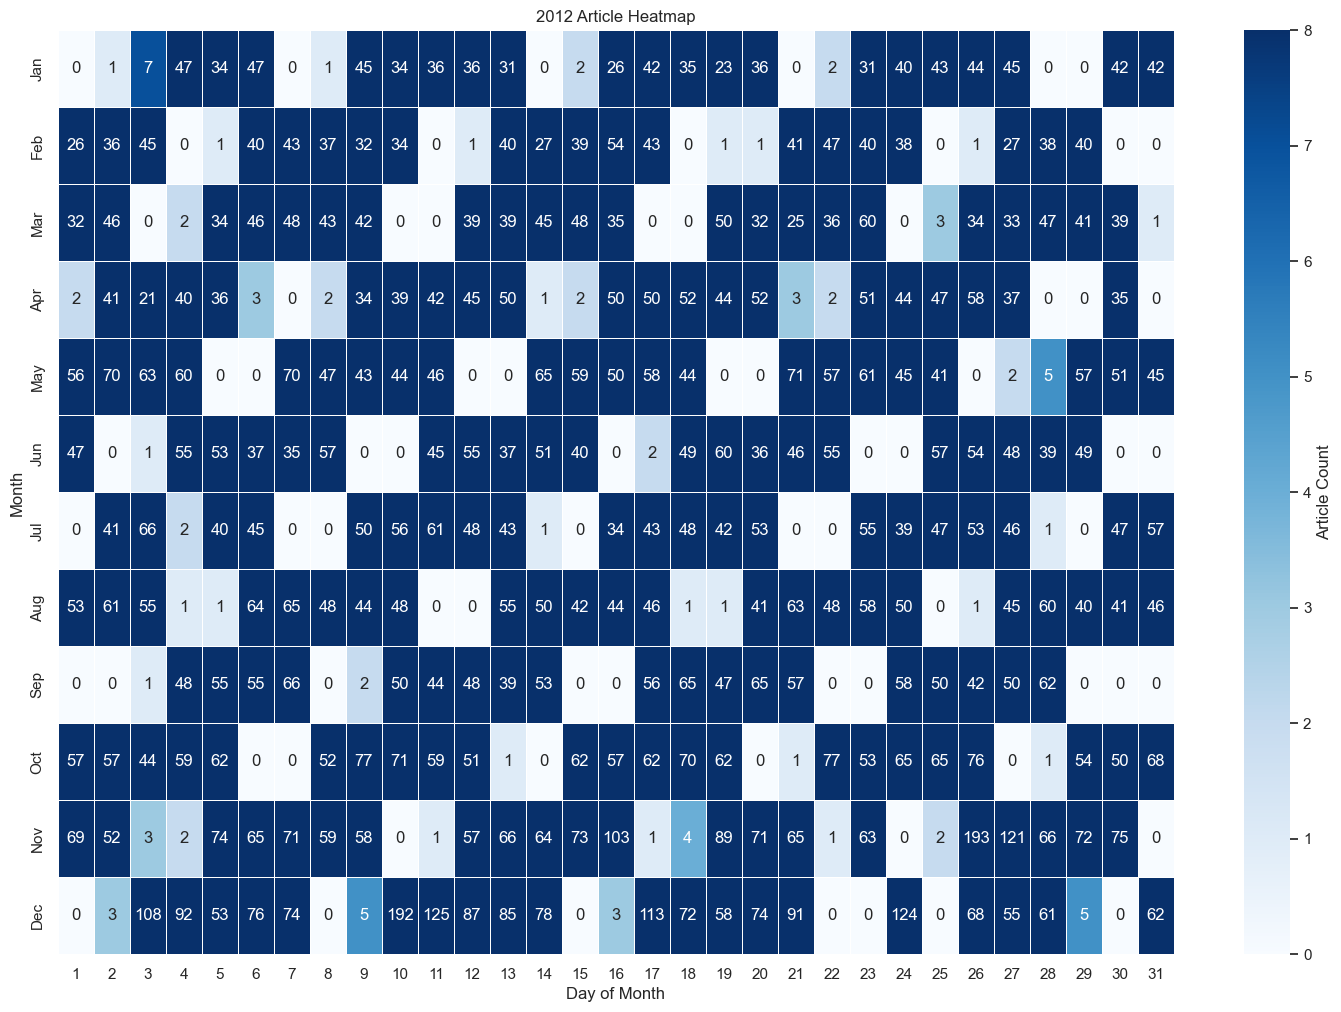

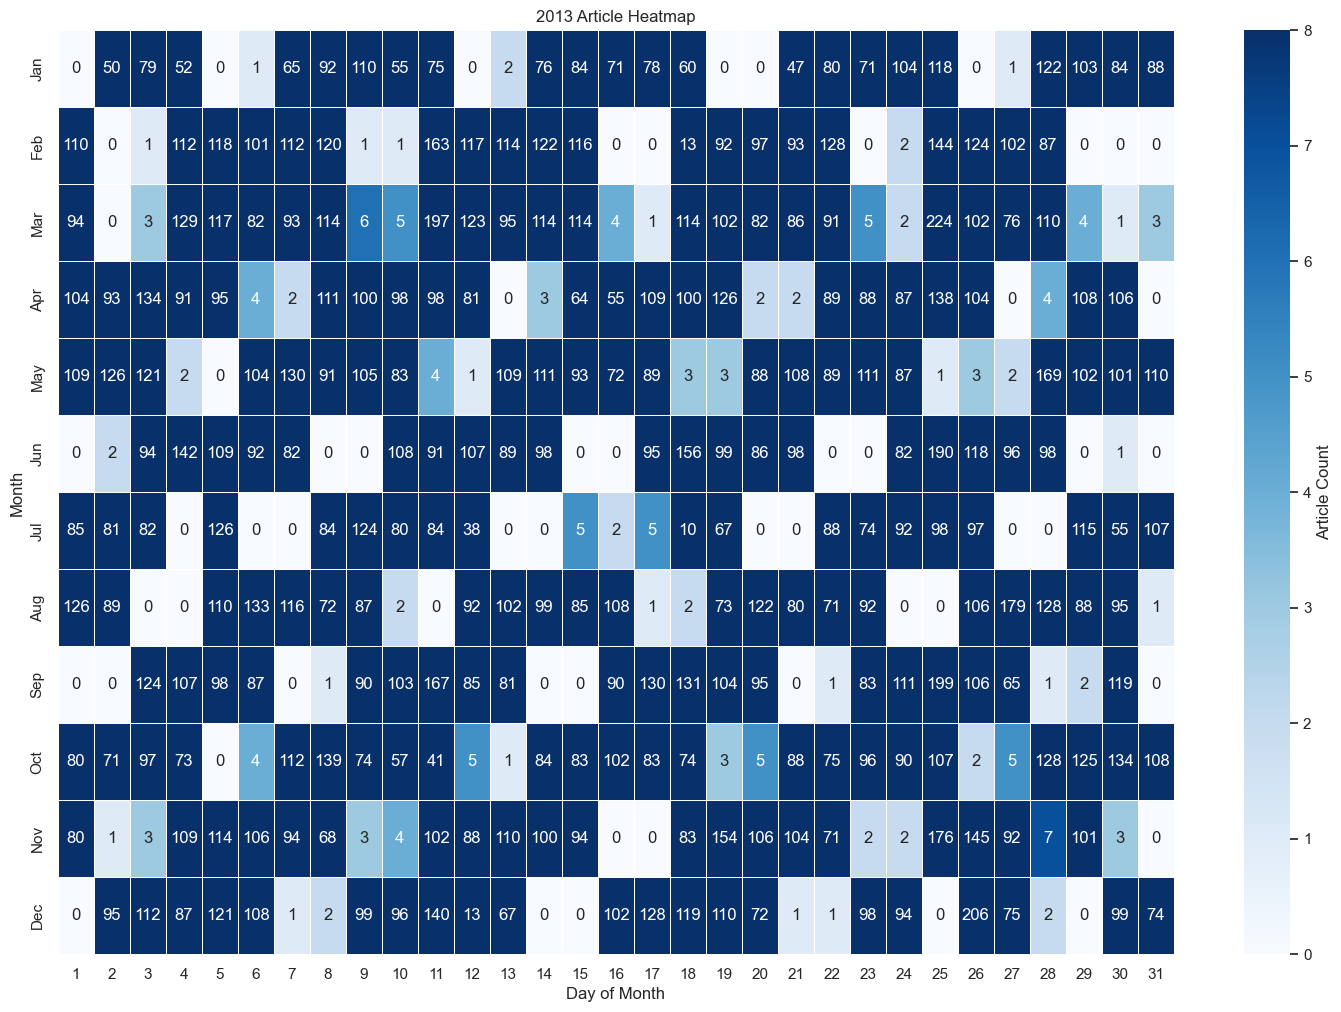

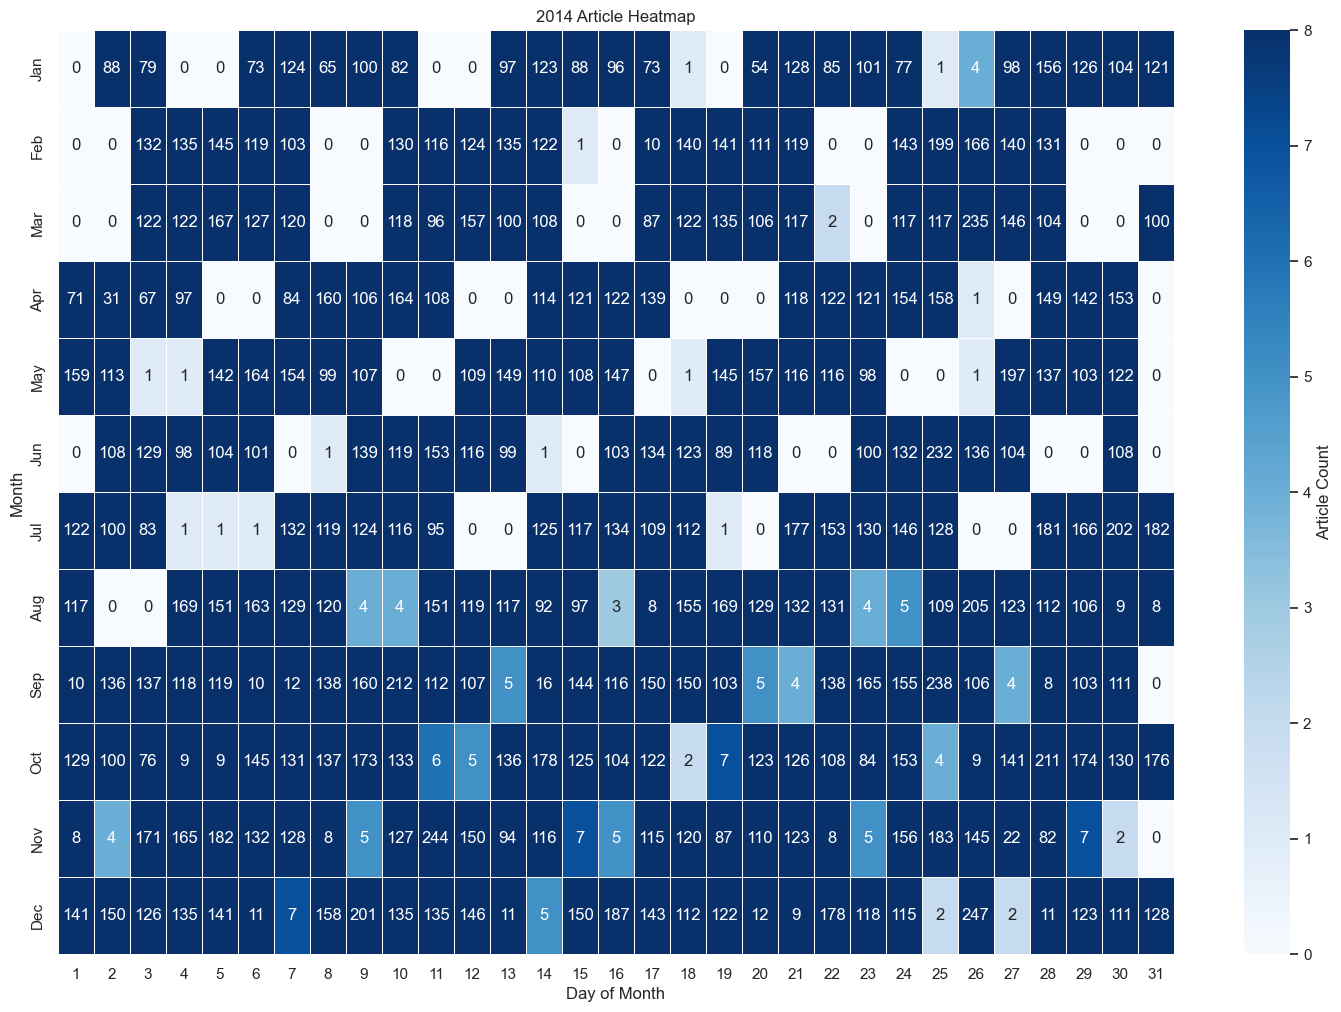

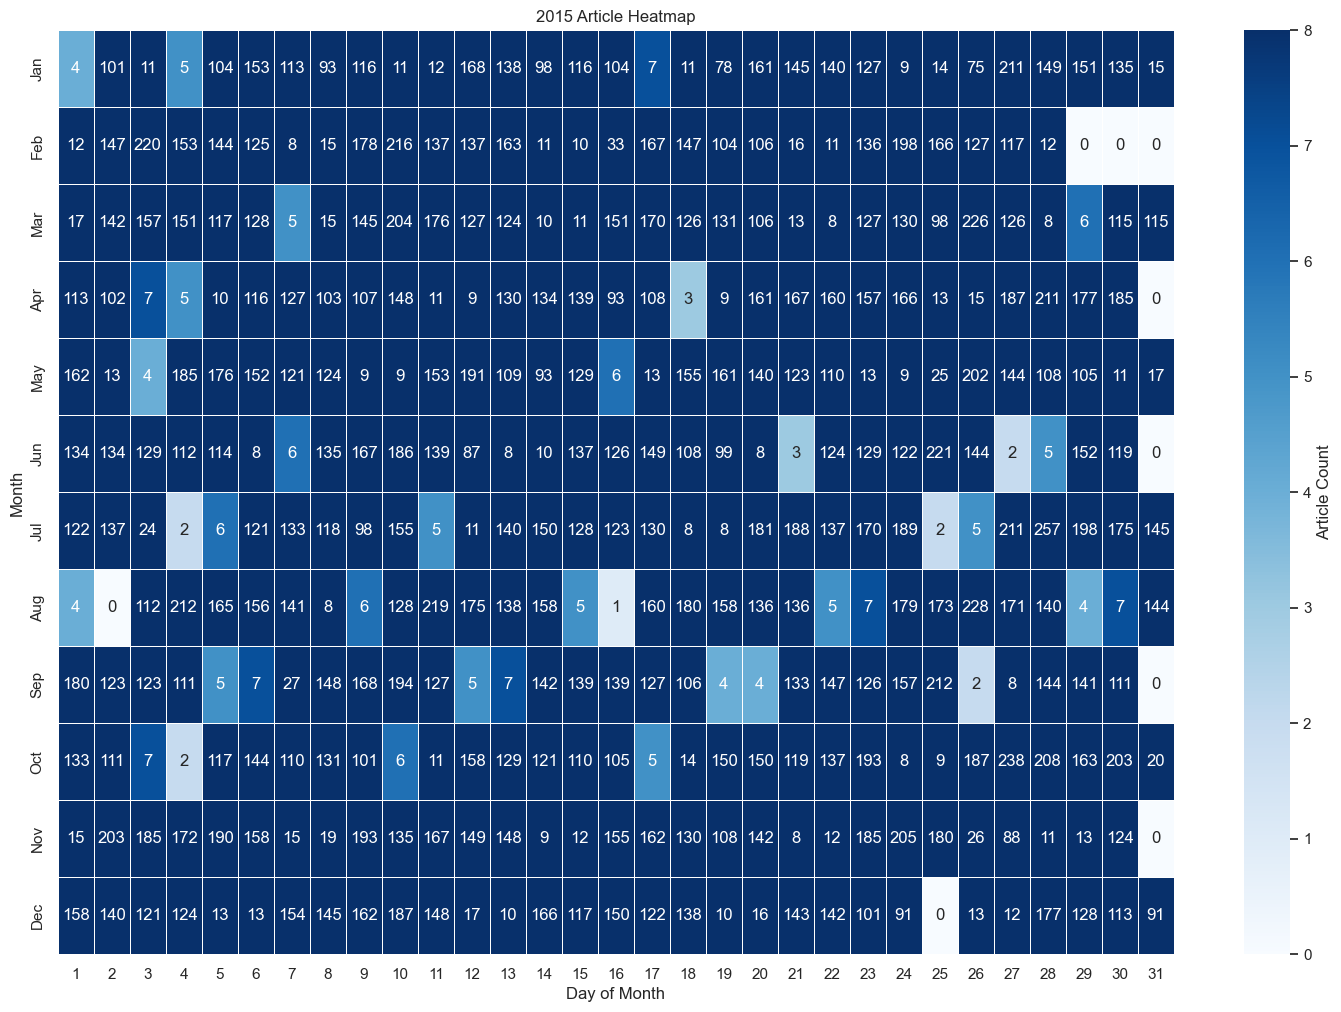

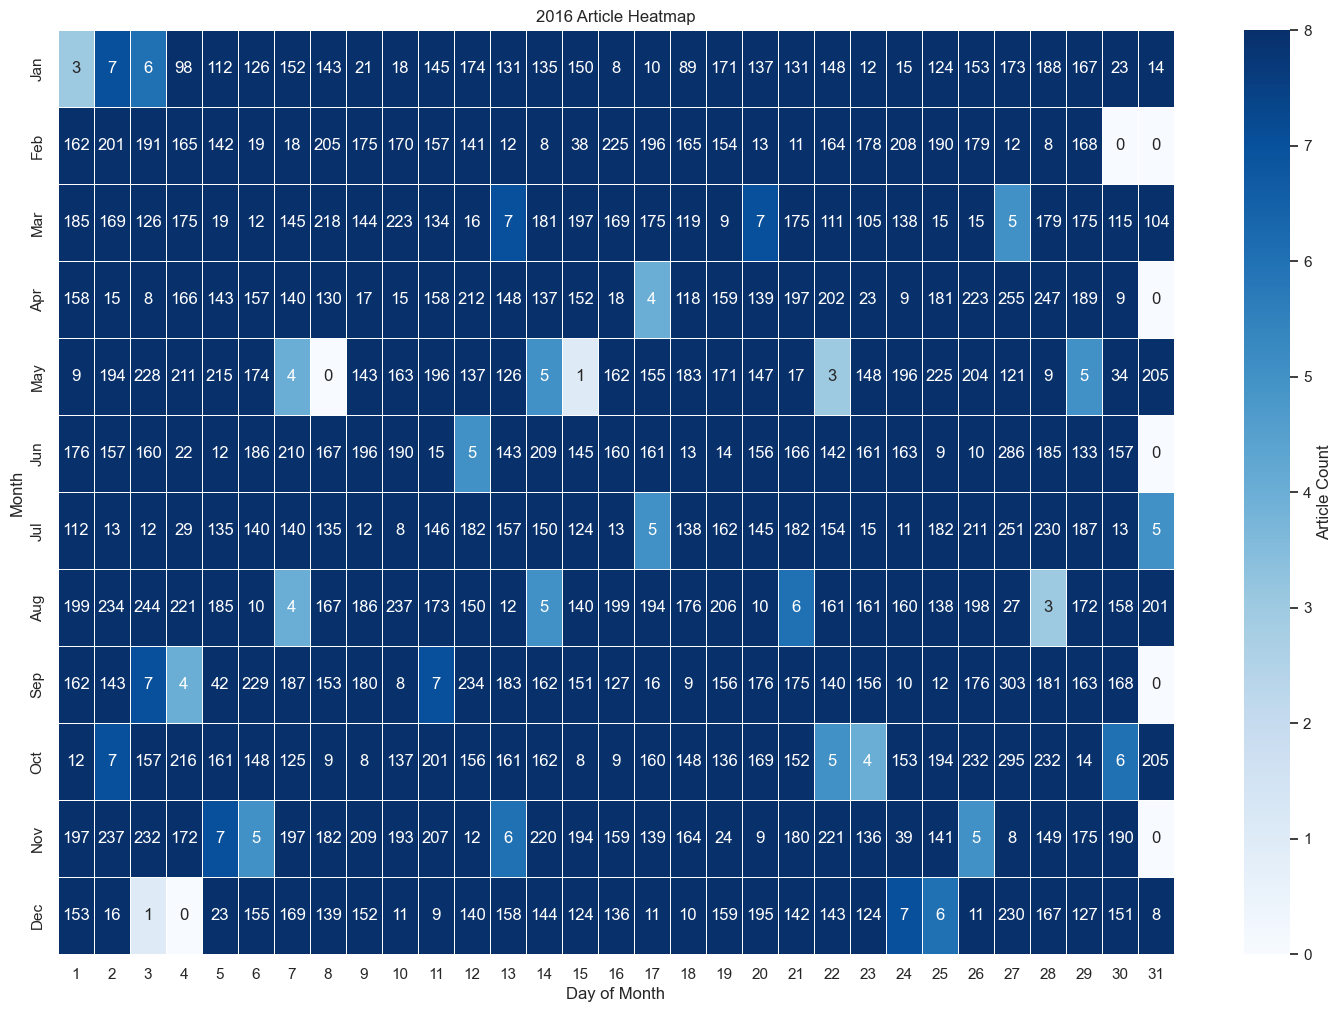

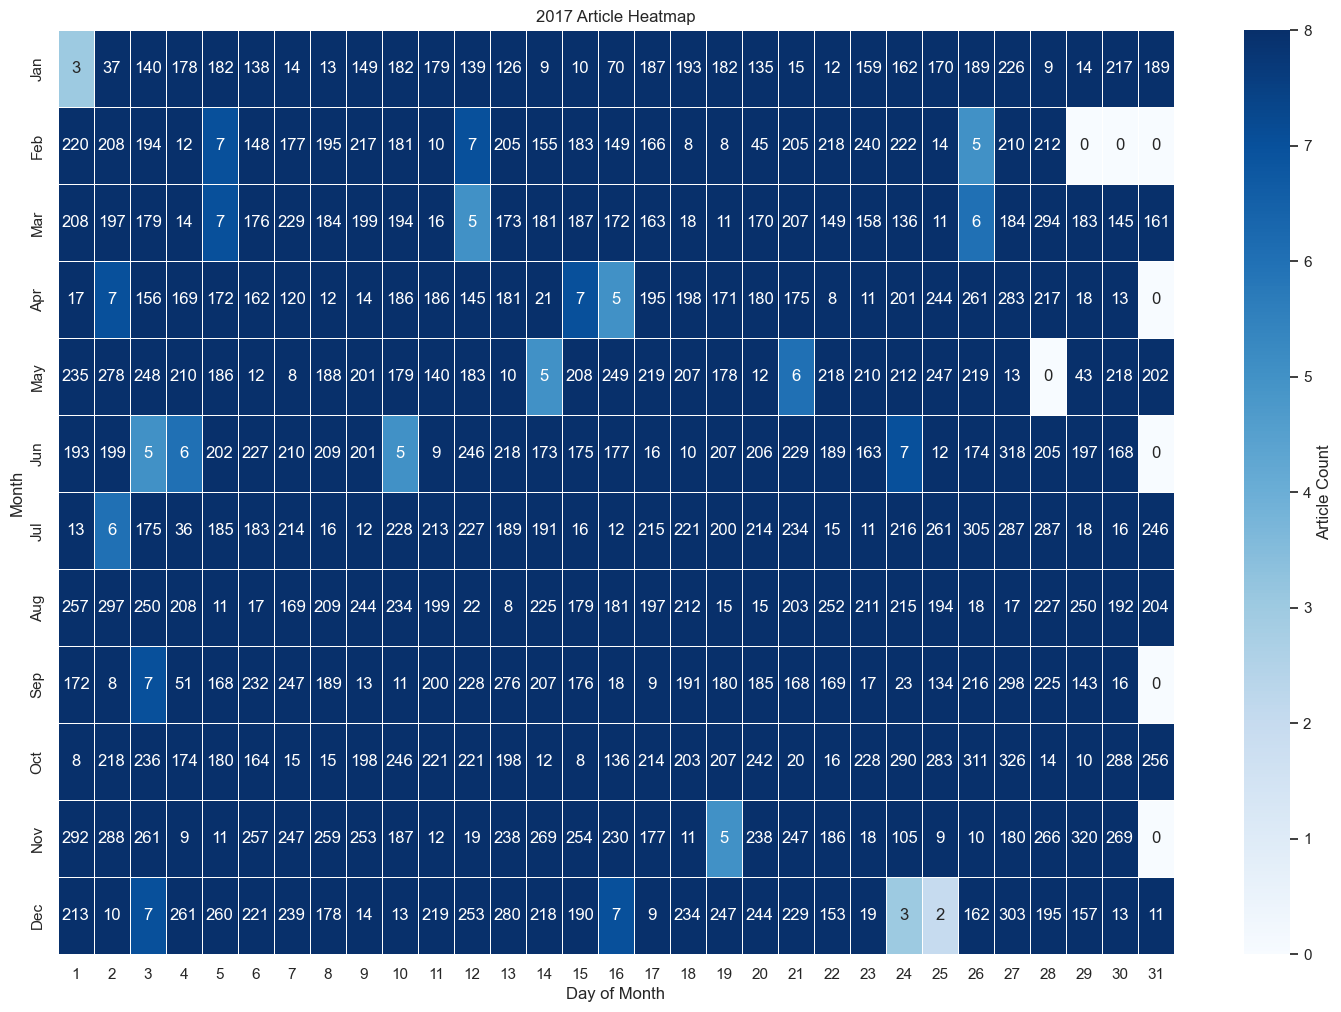

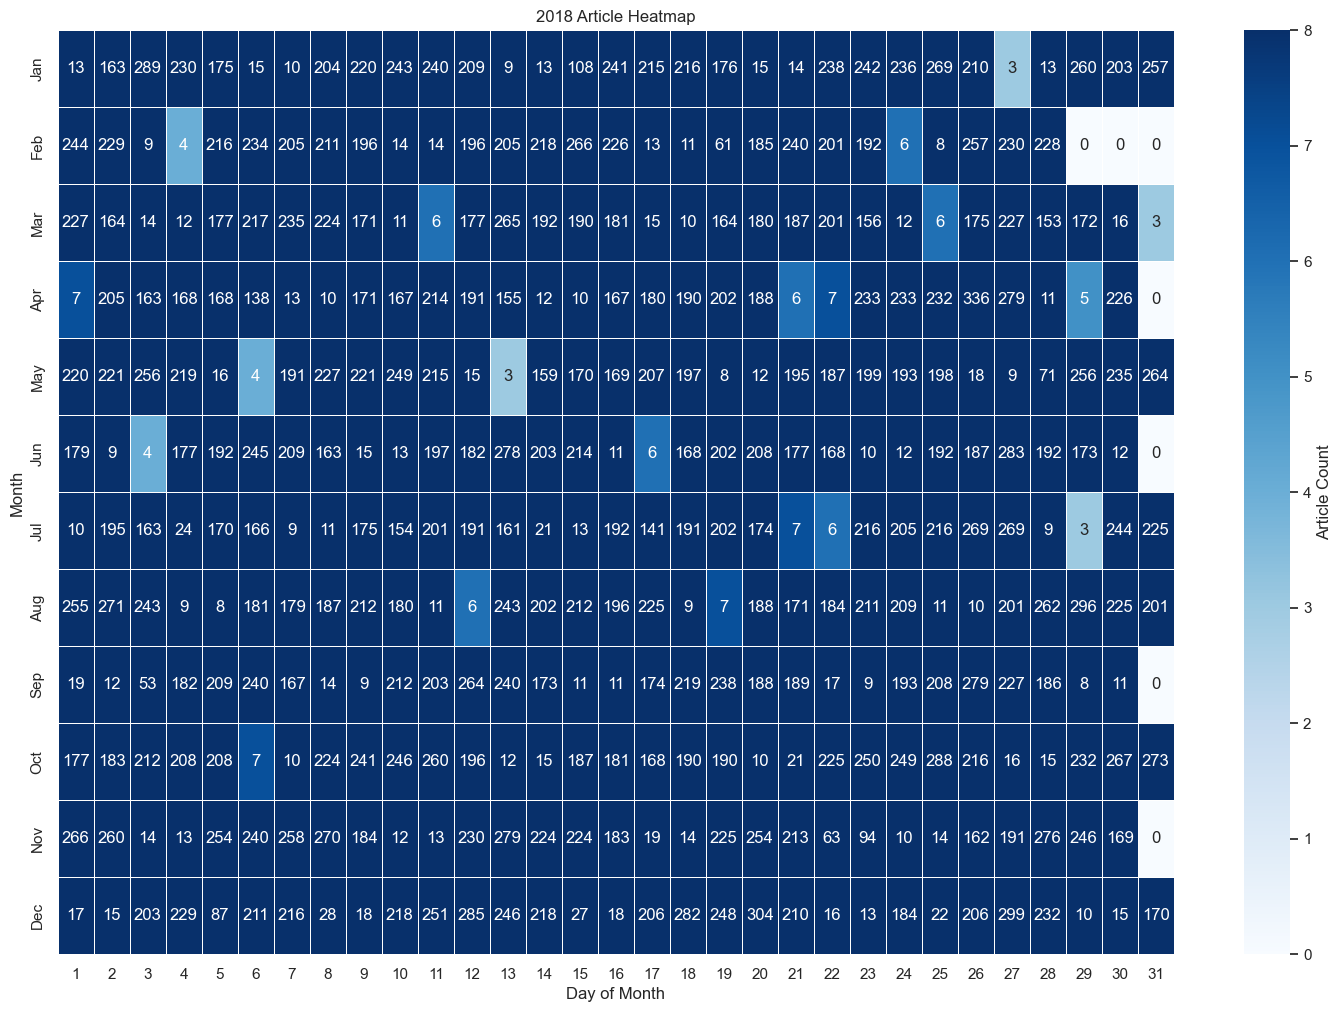

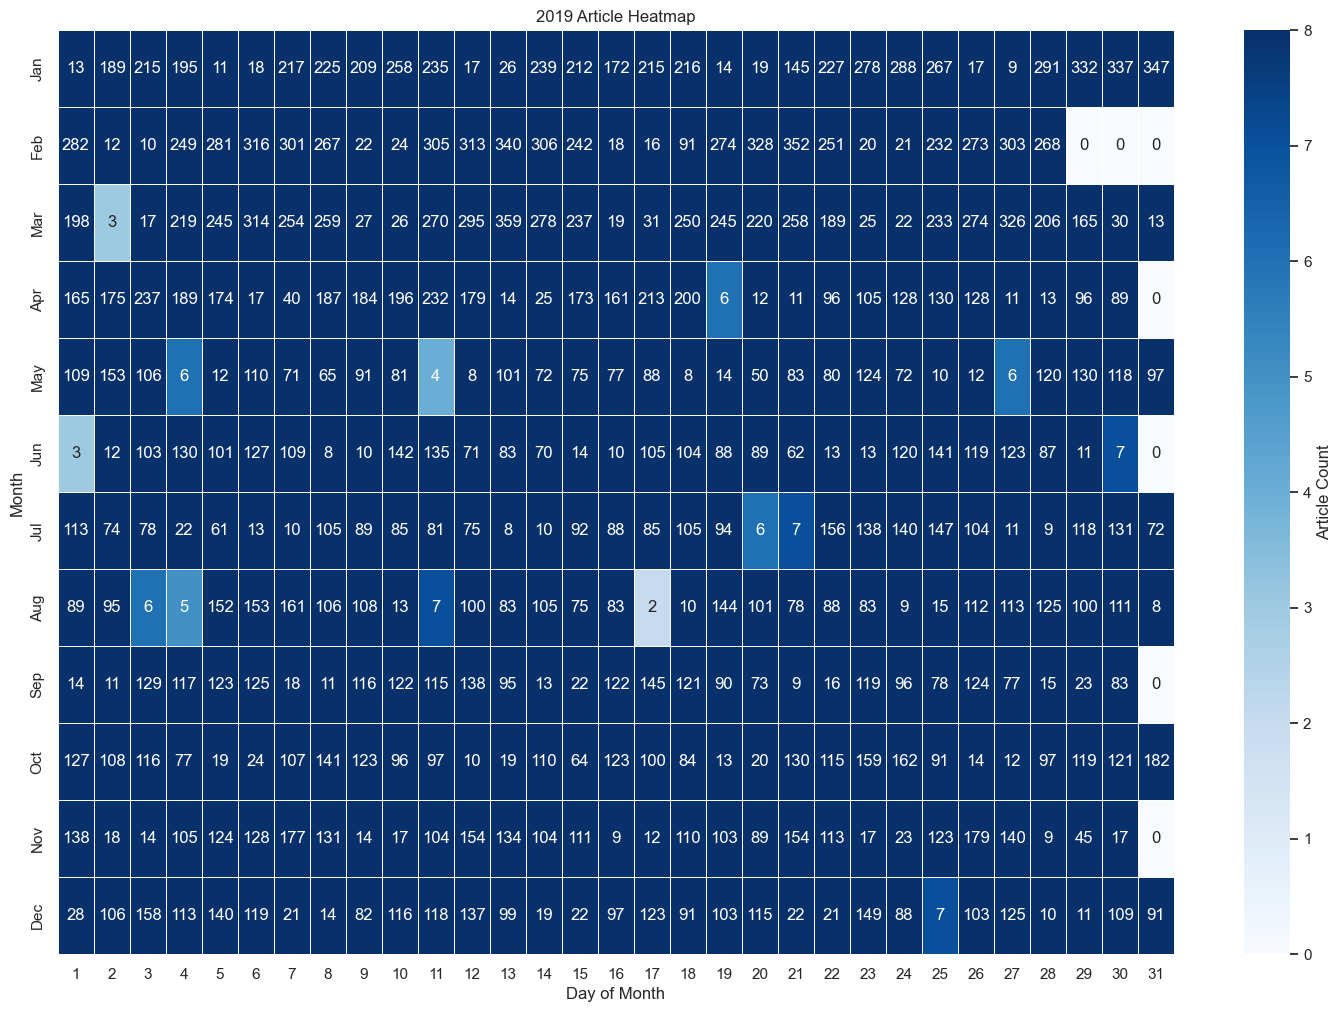

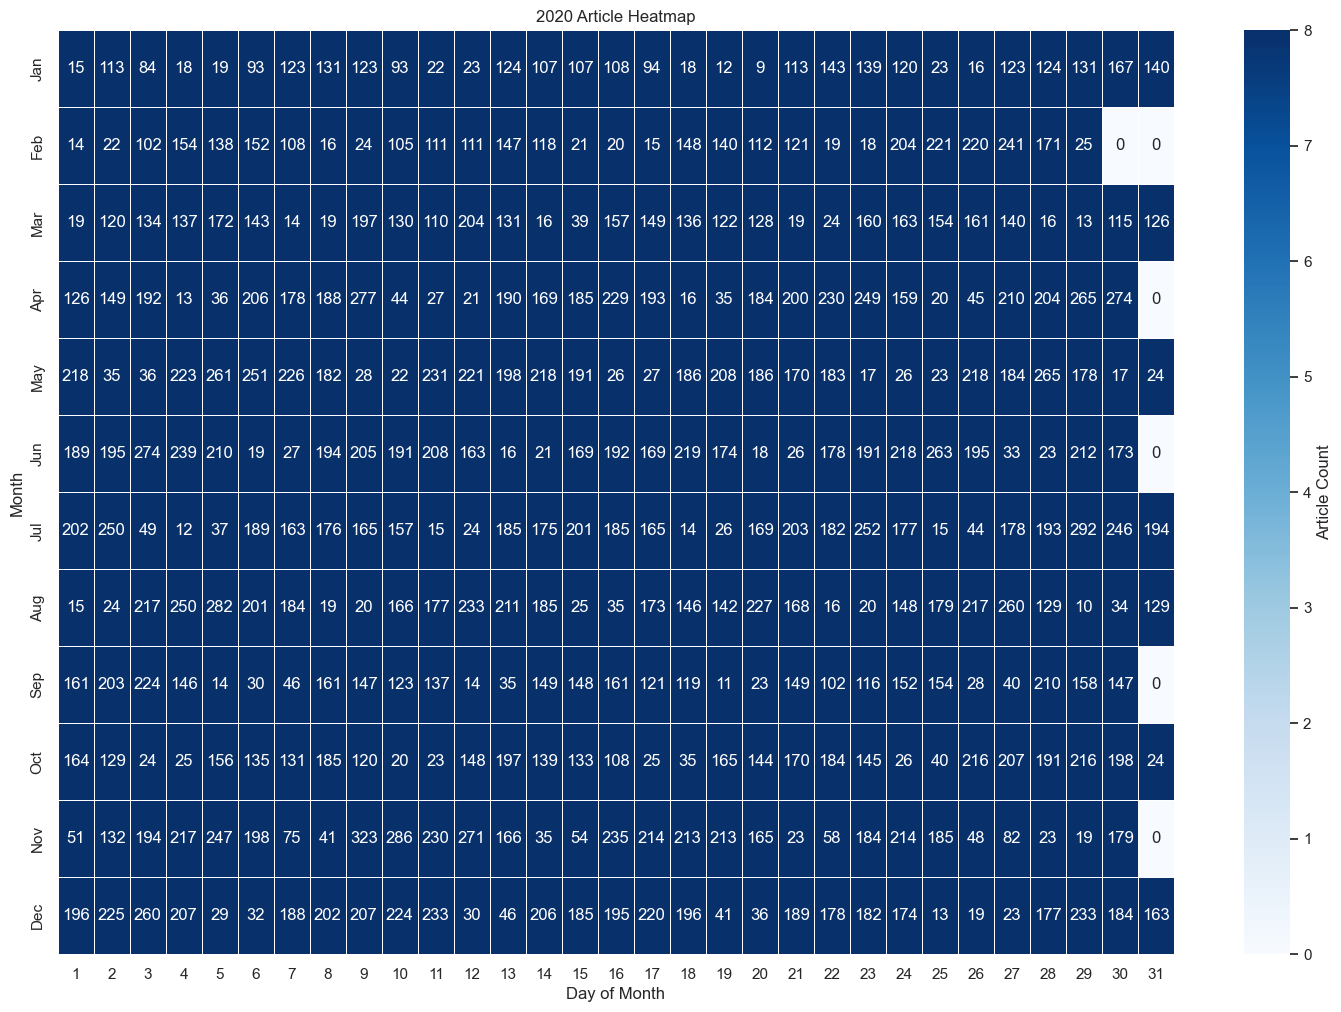

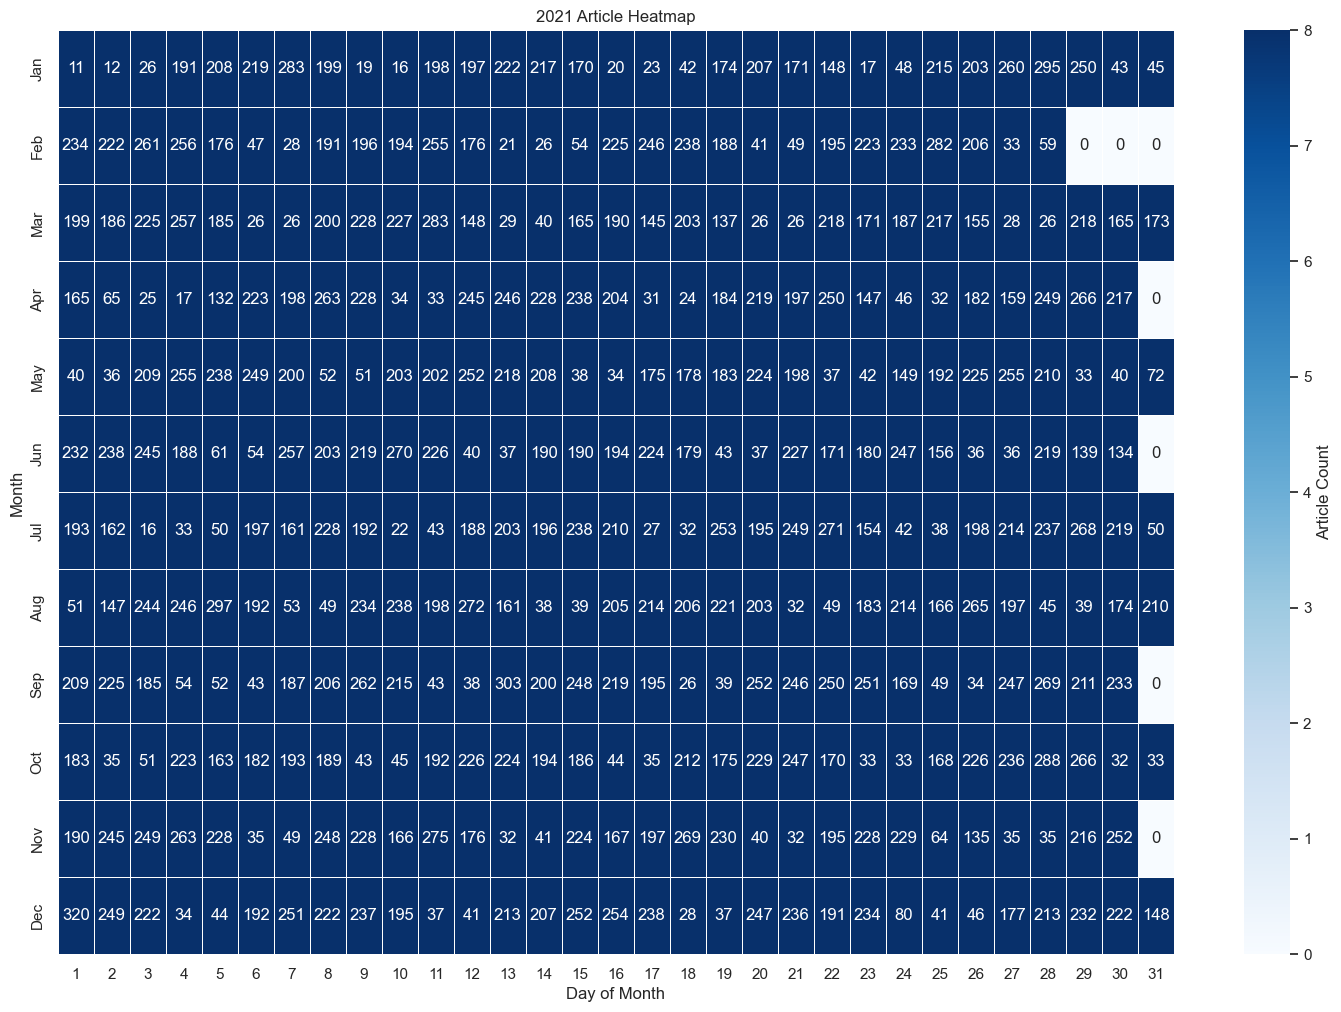

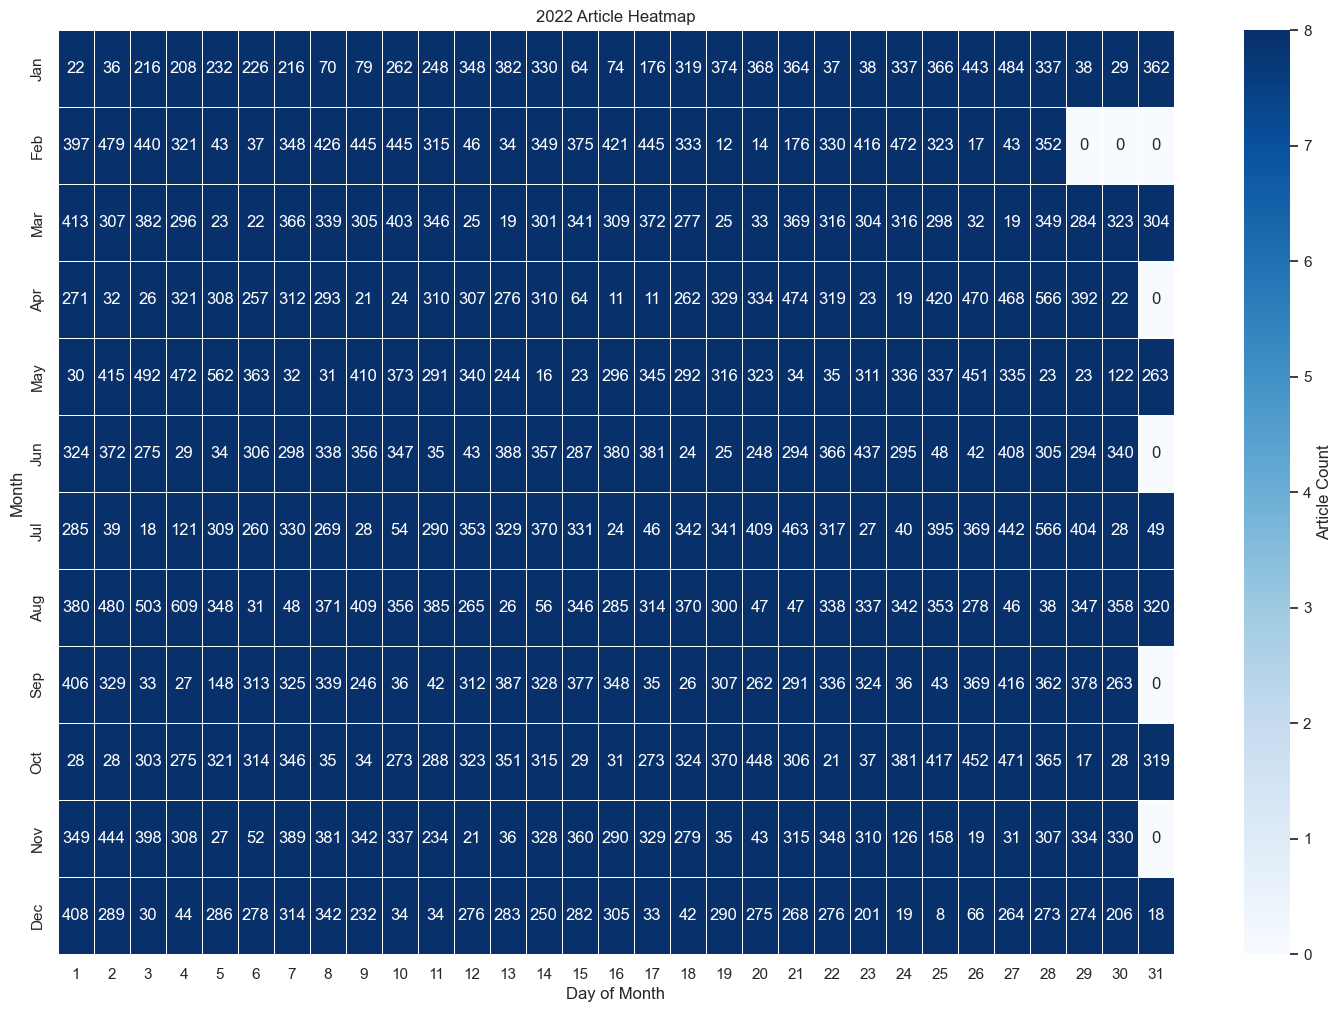

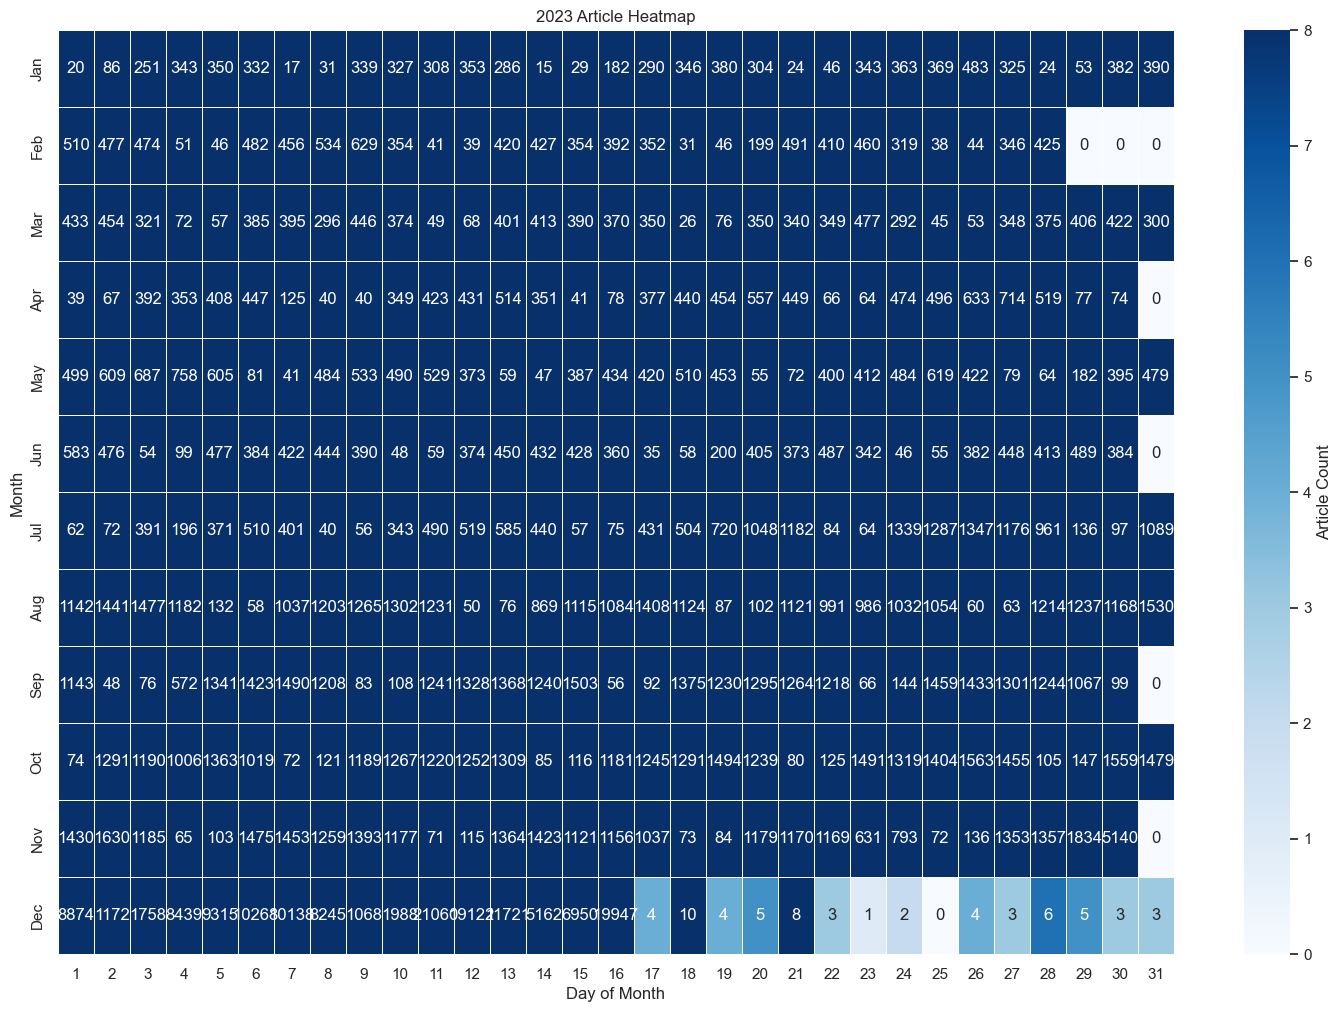

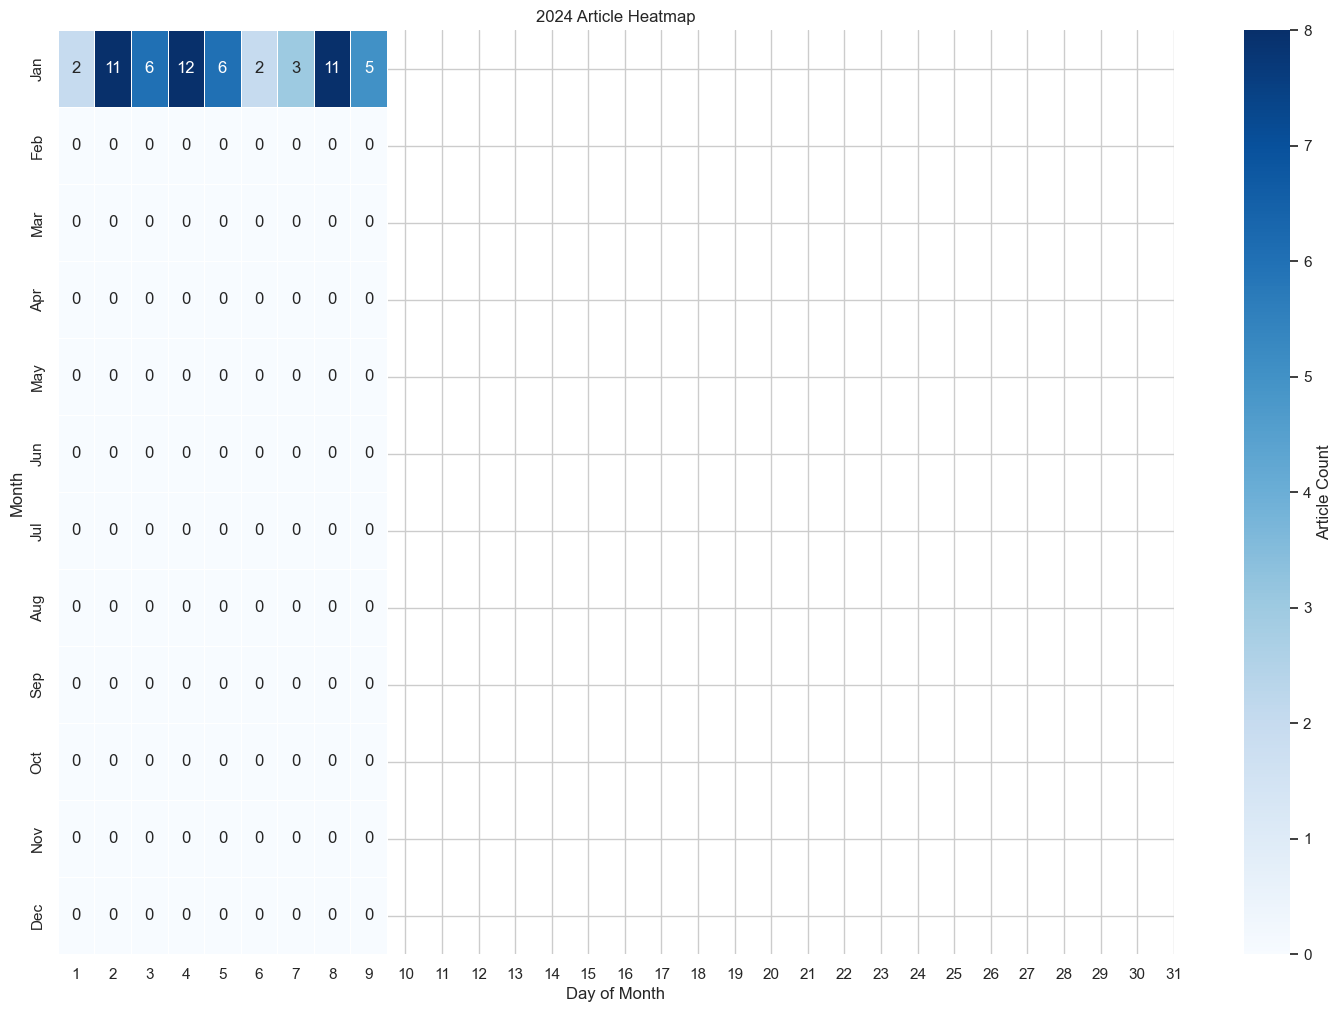

In [157]:
for year in years:
    calendar(df, year)

In [159]:
df['weekday'] = df['Date'].dt.dayofweek

In [160]:
def calendar_by_weekday(df, year):
    """
    Creates a heatmap of article counts by day of the week for a given year.
    
    Args:
    df (DataFrame): The input dataframe with 'year' and 'weekday' columns.
    year (int): The year to filter by.
    """
    # Filter for the selected year
    df_filtered = df[df['year'] == year]

    # Group by month and weekday
    df_grouped = df_filtered.groupby(['month', 'weekday']).size().reset_index(name='count')

    # Pivot to create a heatmap format
    df_pivot = df_grouped.pivot(index='month', columns='weekday', values='count').fillna(0)

    # Define weekday labels
    weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, fmt="g", cmap="Blues", cbar_kws={'label': 'Article Count'},
                xticklabels=weekday_labels,
                yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                linewidths=0.5, vmin=0, vmax=8)

    # Customize the axes and title
    plt.title(f'Article Heatmap by Weekday - {year}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Month')

    # Show the plot
    plt.show()

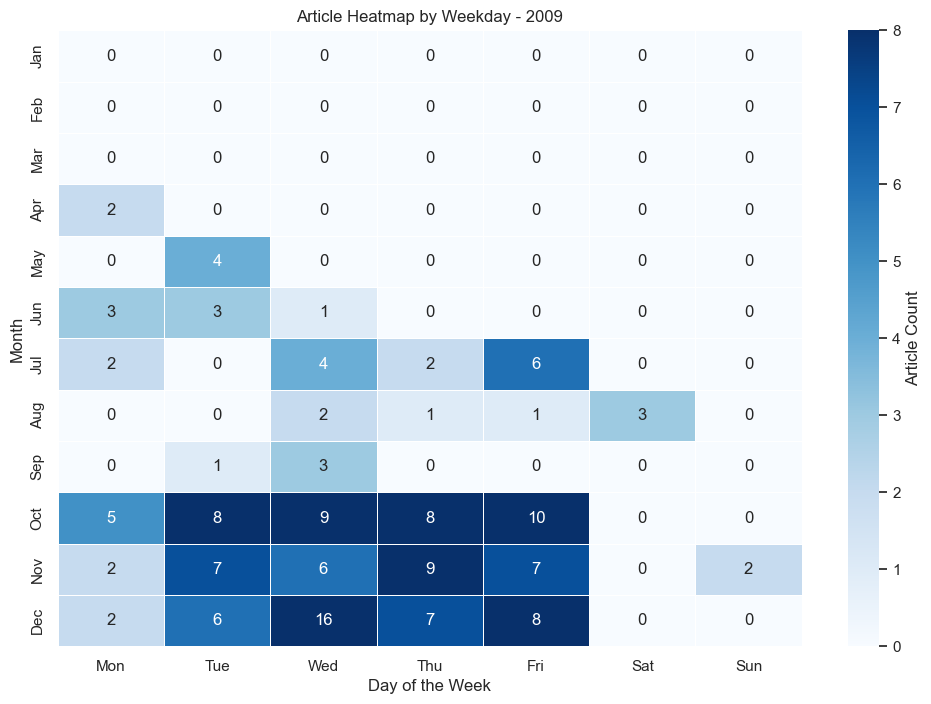

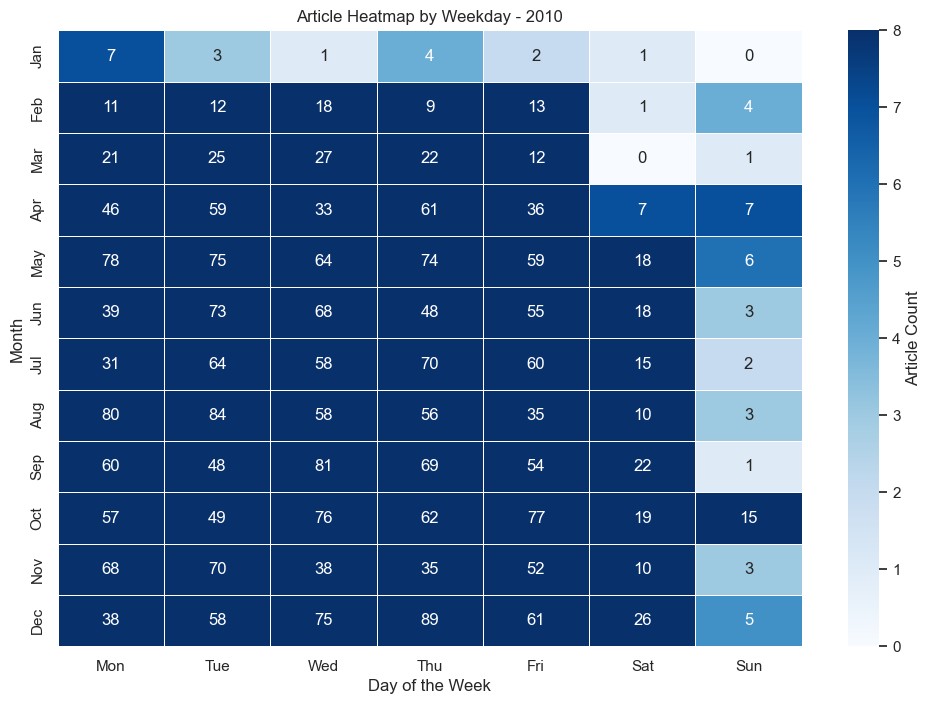

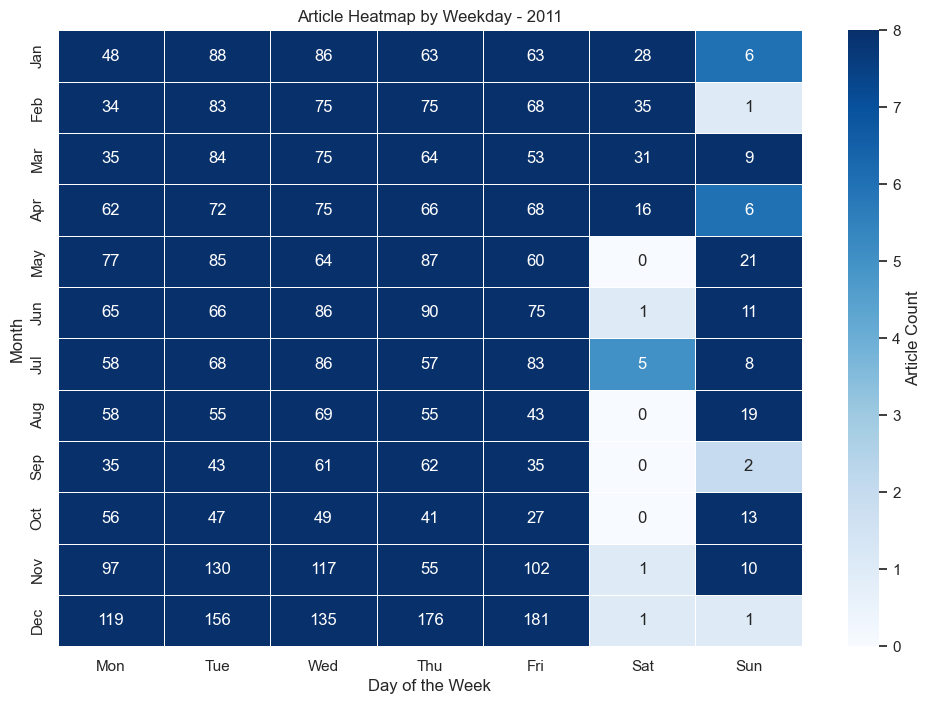

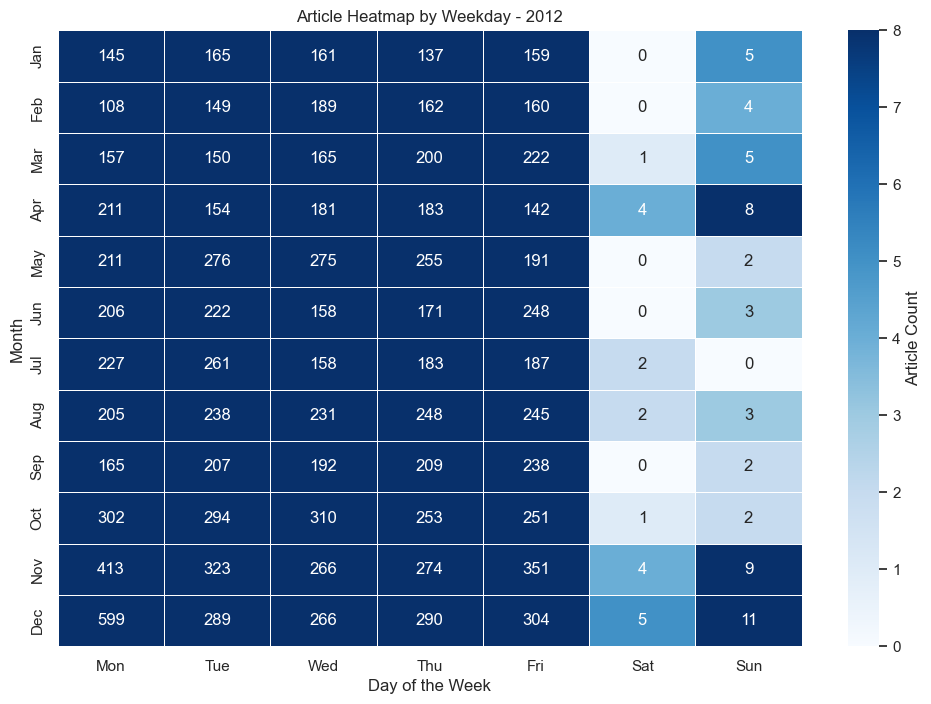

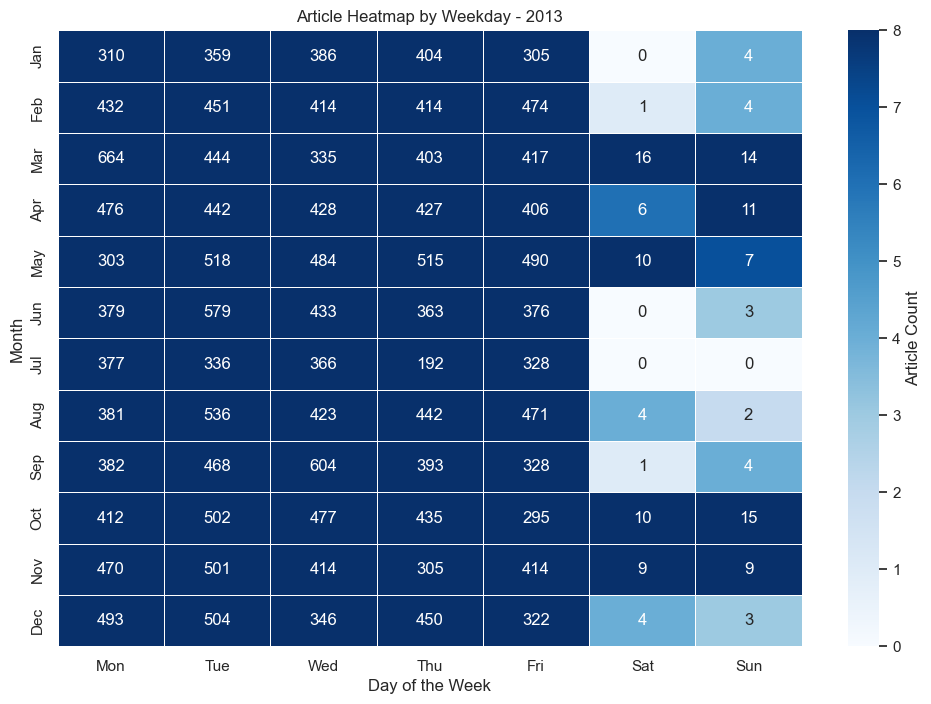

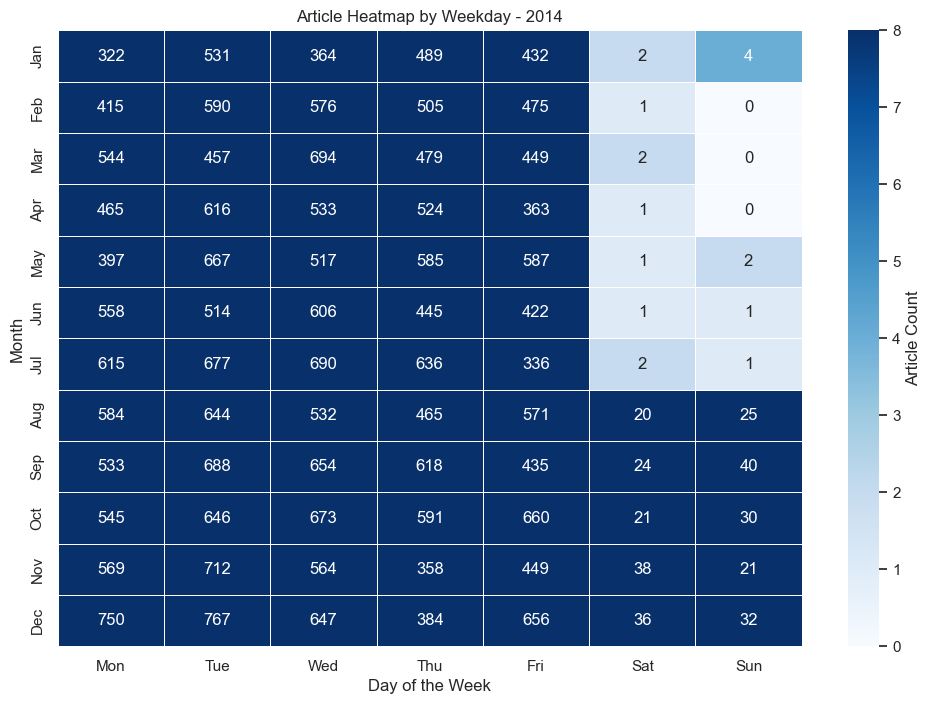

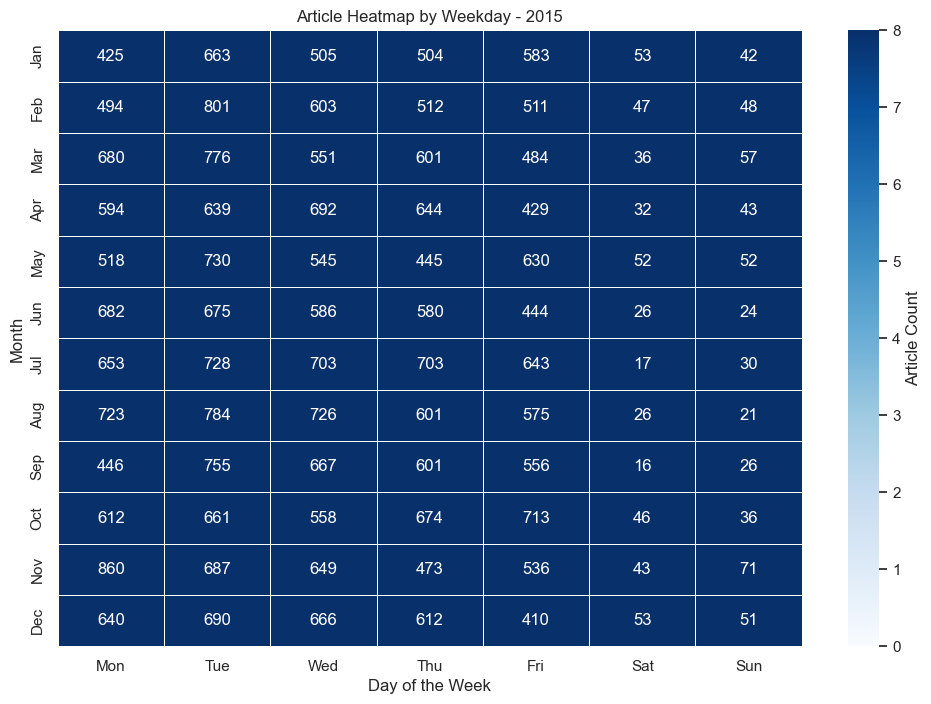

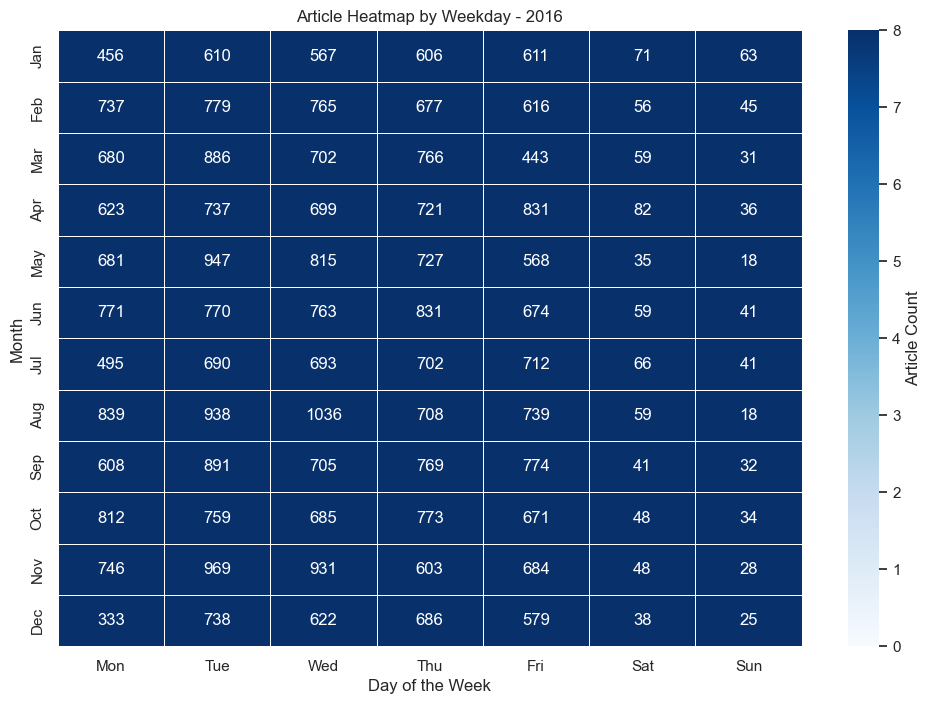

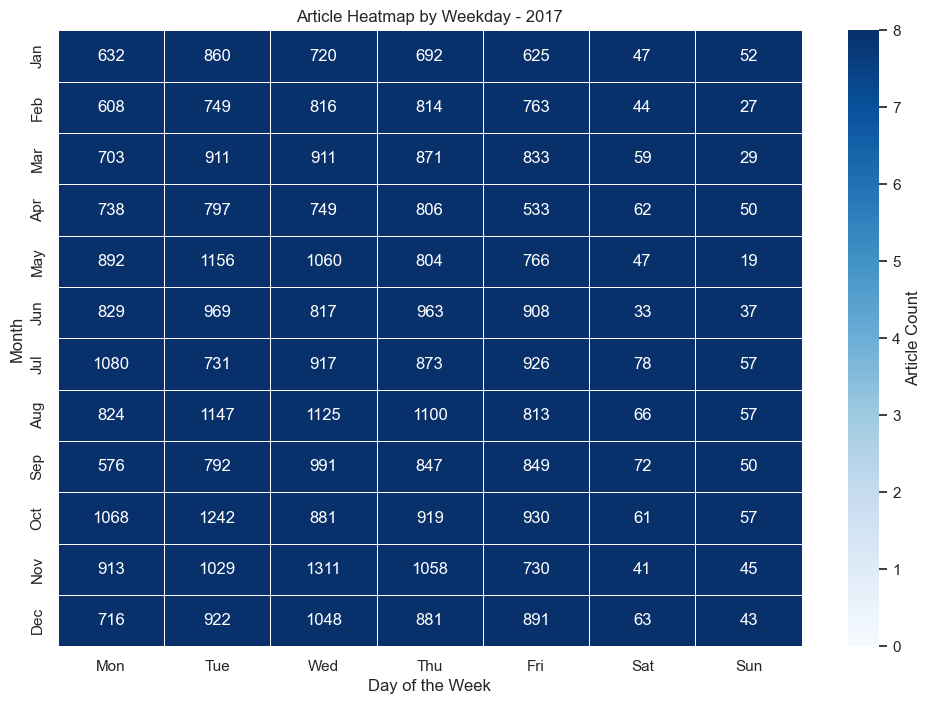

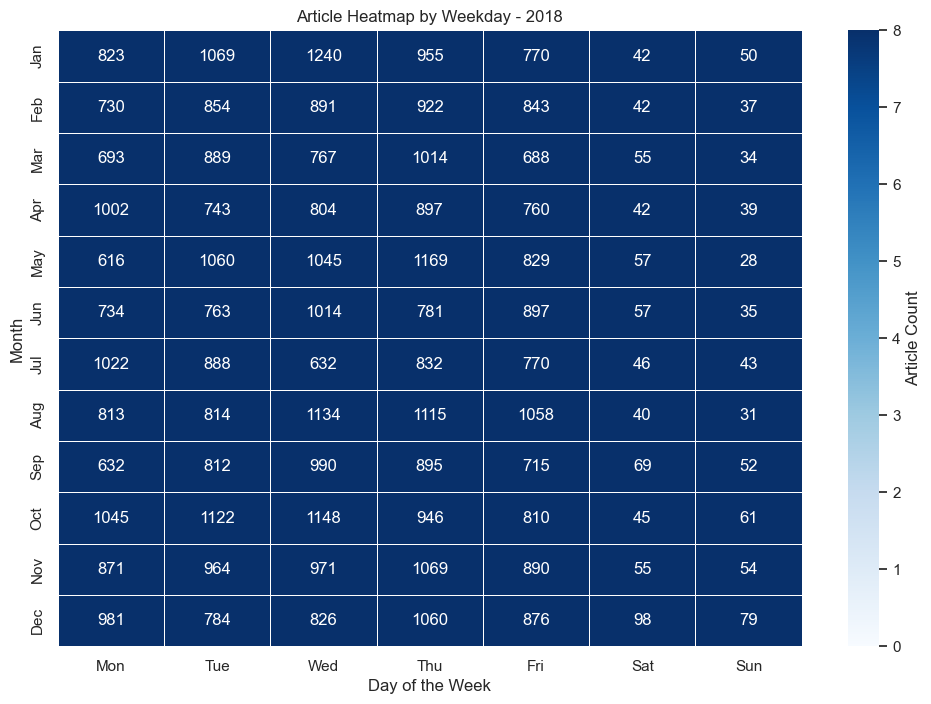

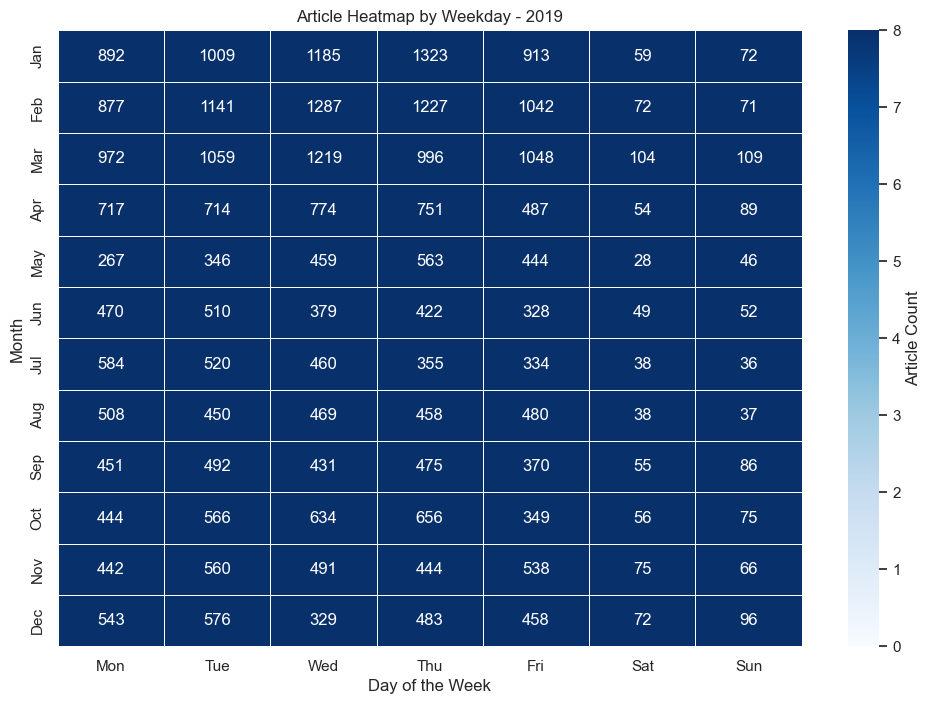

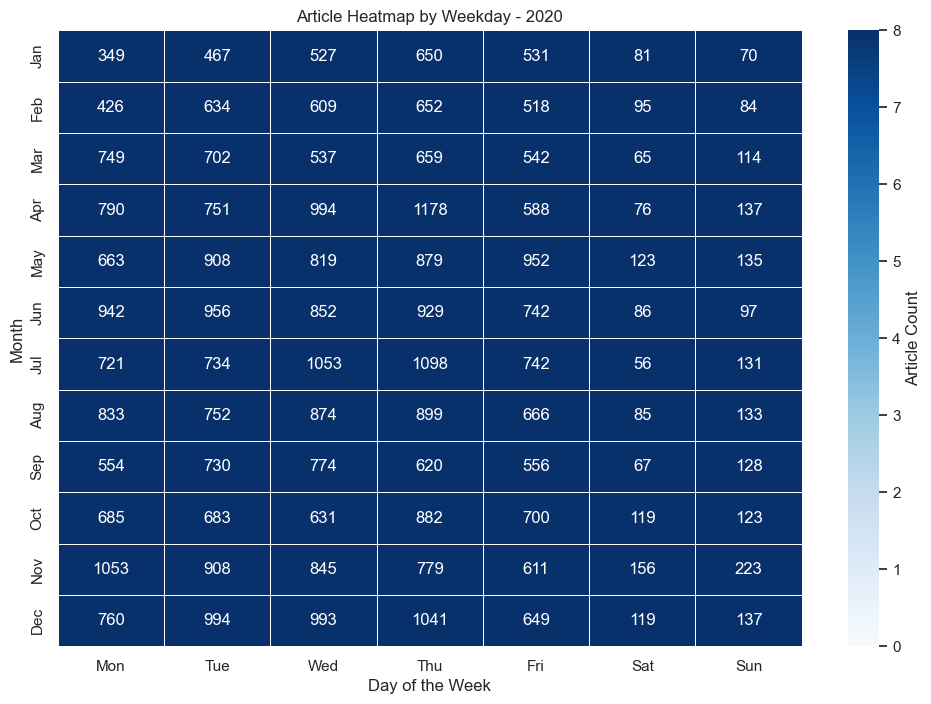

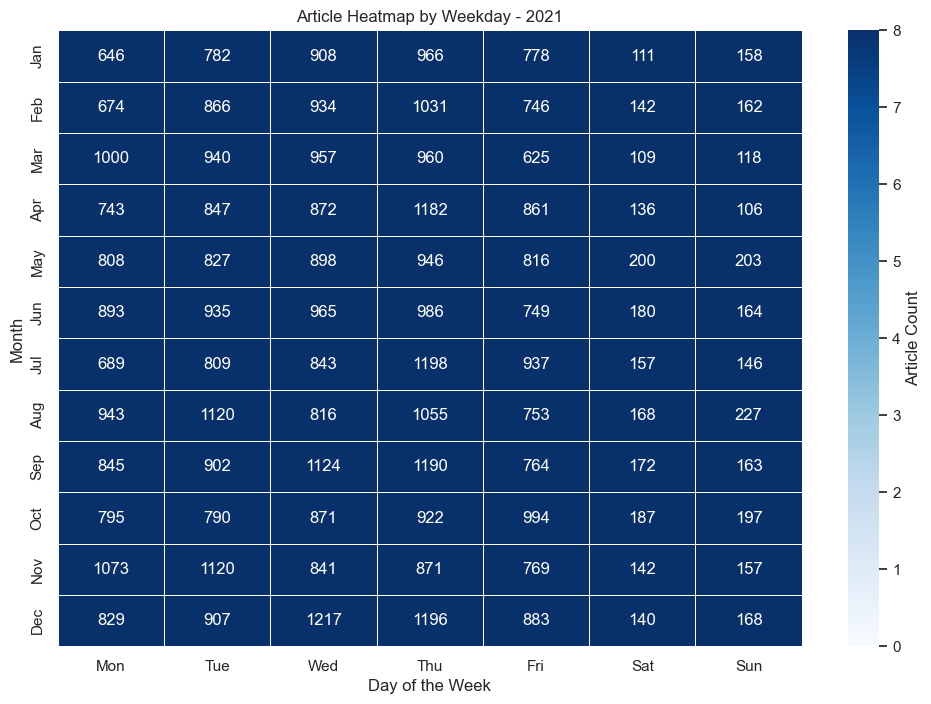

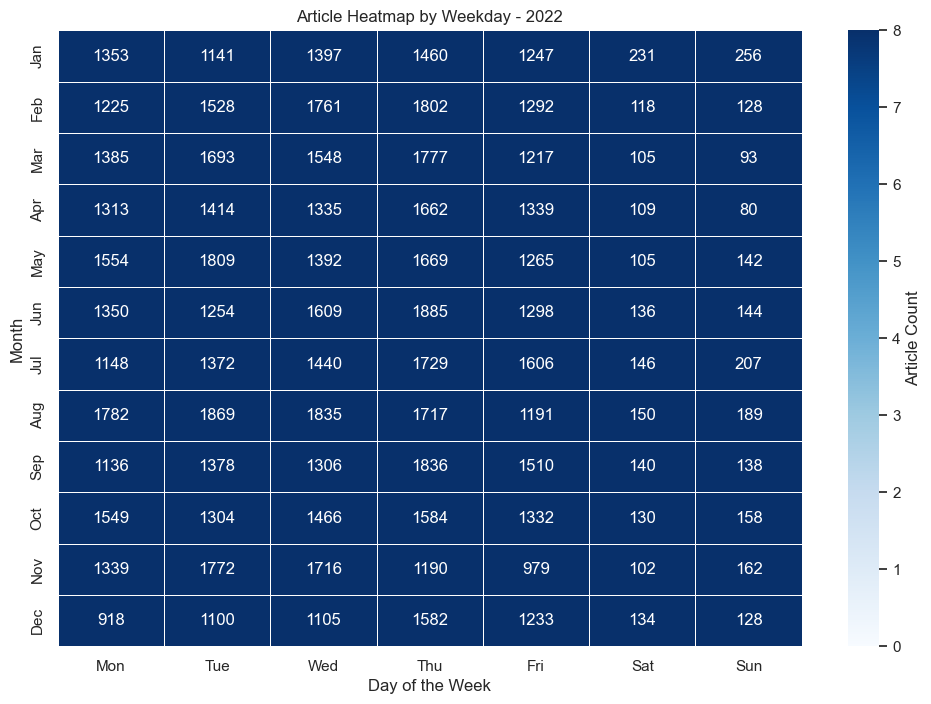

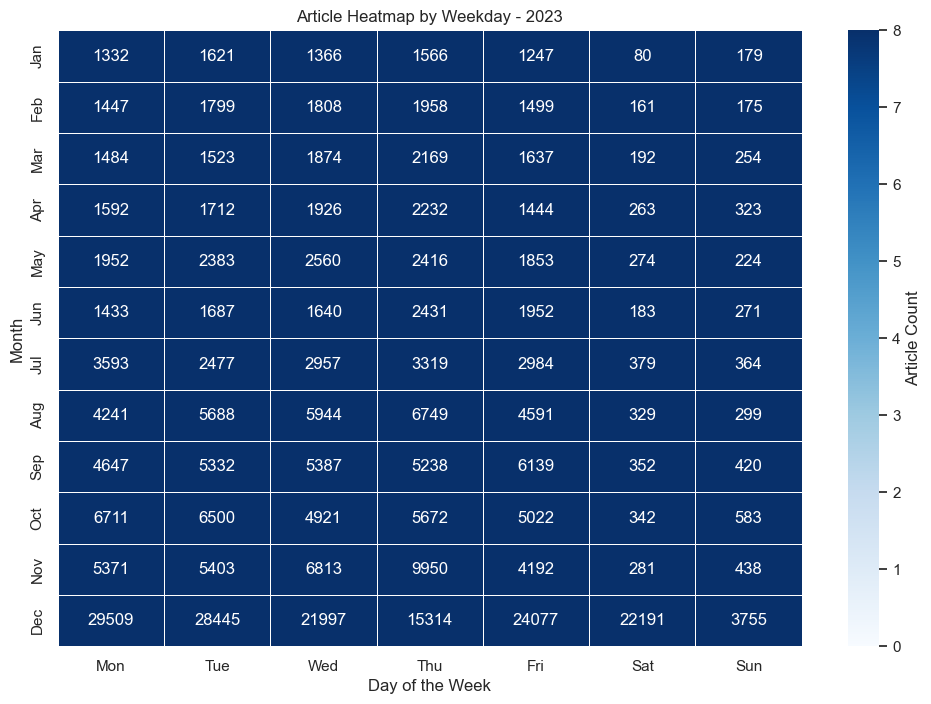

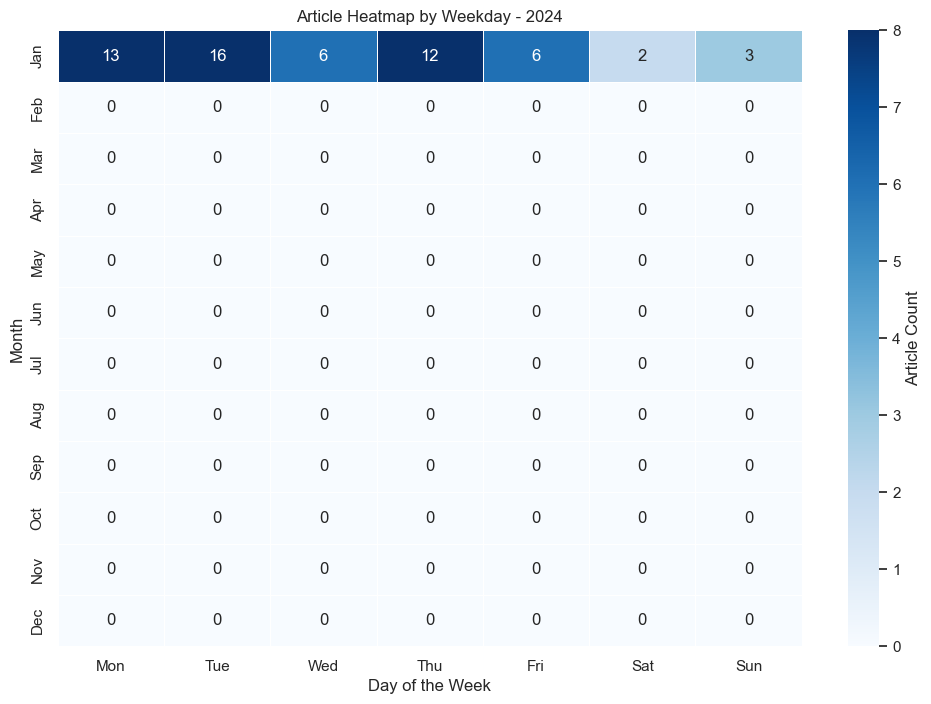

In [164]:
for year in years:
    calendar_by_weekday(df, year)